In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import cmapPy.pandasGEXpress as pandasGEXpress
import cmapPy.pandasGEXpress.parse as cparse
#import cmapPy.pandasGEXpress.parse

from cmapPy.pandasGEXpress.write_gct import write
from cmapPy.pandasGEXpress import gctx2gct
from cmapPy.pandasGEXpress import*

from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
siginfo = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/siginfo_beta.txt", sep = '\t')

/tmp/ipykernel_11560/122777034.py:1: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  siginfo = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/siginfo_beta.txt", sep = '\t')


In [5]:
control_data_5 = cparse.parse("/home/ndjed/Programs/VSCode/LINCS_Project/level5_beta_ctl_n58022x12328.gctx")
control_df_5 = control_data_5.data_df

In [3]:
cp_data_5_brca = pd.read_csv("/home/ndjed/Programs/VSCode/LINCS_Project/BRCA_COMPOUND_5_DATA_5_DRUGS")

In [6]:
gene_names = pd.read_csv("/data3/balaji/cmap/geneinfo_beta.txt", sep = '\t')


In [9]:
cp_data_5_brca

ASG002_22RV1_24H:G01  ASG002_22RV1_24H:G02  ASG002_22RV1_24H:G03  \
0                    6.3341                5.2243                1.4654   
1                    5.7040                3.8875                1.5365   
2                   -2.9910               -1.9209               -1.0358   
3                    3.9700                5.6208                0.5289   
4                   -2.3277               -2.3518                0.2349   
...                     ...                   ...                   ...   
12323                4.2057                3.6518                1.9640   
12324                1.6694               -0.2801               -1.4899   
12325                6.7483                5.7797                1.7852   
12326                3.6206                3.9382                0.8368   
12327                2.1597               -2.6141                0.5818   

       ASG002_A204_24H:G01  ASG002_A204_24H:G02  ASG002_A204_24H:G03  \
0                   6.2629               3.9781               1.2195   
1                   1.6703               1.3070               2.7850   
2                  -2.9038              -5.0097              -2.3691   
3                   3.9876               2.2609              -0.5697   
4                  -3.5842              -1.6755              -1.4238   
...                    ...                  ...                  ...   
12323               3.4635               3.6315               2.9119   
12324               1.8976               2.9089              -1.2112   
12325               3.7609               4.1686               2.2781   
12326               2.9154               2.0799               2.1706   
12327              -1.1932               1.3871               0.6373   

       ASG002_A375_24H:G01  ASG002_A375_24H:G02  ASG002_A375_24H:G03  \
0                   6.1488               4.0922               1.1059   
1                   5.4293               0.7800               1.4167   
2                  -2.9722              -4.9434              -1.7842   
3                   1.9401               0.9537              -0.4397   
4                  -7.8688               0.3276               0.1025   
...                    ...                  ...                  ...   
12323               2.6375               1.7725               4.3800   
12324              -5.8008              -2.5927              -1.6764   
12325               9.5054               3.4288               2.5153   
12326               6.0032               4.7213               1.1074   
12327              -1.6868               0.7457               3.2476   

       ASG002_A549_24H:G01  ...  REP.B026_YAPC_24H:K15  REP.B026_YAPC_24H:K16  \
0                 4.514831  ...                0.81095                0.19735   
1                 3.941693  ...               -0.43355                0.35725   
2                -2.379551  ...               -0.92210                0.73370   
3                 0.792092  ...               -0.39895                0.41420   
4                -5.111275  ...               -1.41400               -0.27745   
...                    ...  ...                    ...                    ...   
12323             4.631664  ...               -0.32870               -1.02080   
12324            -0.796254  ...                0.44215                0.03705   
12325             6.226738  ...                0.96875                0.05385   
12326             6.225053  ...                0.25605               -0.05165   
12327            -0.384285  ...                0.16045               -0.98140   

       REP.B026_YAPC_24H:K17  REP.B026_YAPC_24H:K18  REP.B026_YAPC_24H:L19  \
0                   -1.12305                0.01275               -1.67480   
1                   -0.04215                0.11075               -1.35725   
2                   -0.46610               -0.21345               -1.44465   
3                    0.53530                0.14940                1.87780   
4            

In [10]:
pca = PCA(n_components=50)


X = pca.fit(cp_data_5_brca).transform(cp_data_5_brca)


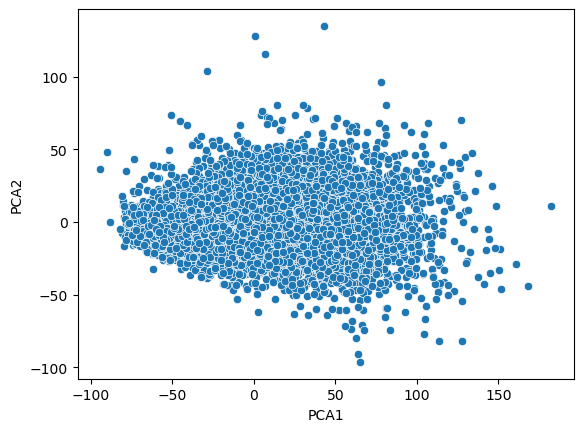

In [17]:
le = LabelEncoder()
target = ['doxorubicin', "epirubicin", 'paclitaxel', 'docitaxel', 'capecitabine']
le.fit(target)

y_lan = le.transform(target)
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])

pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]

# pca_df["Disease"] = target

# pca_df["label"] = y_lan

ax = sns.scatterplot(x = "PCA1", y = "PCA2", data = pca_df)


In [18]:
data = pd.read_table("/home/ndjed/Downloads/201028_GSE122505_Leukemia_clean.txt")

In [19]:
data

DDR1   MIR4640      RFC2     HSPA6      PAX8    GUCA1A    MIR5193  \
0     7.135135  7.135135  6.482099  6.676021  6.645632  6.382956   9.792603   
1     7.379455  7.379455  6.824016  6.575389  6.866953  5.777188   9.868853   
2     7.776574  7.776574  6.777692  6.833048  6.740570  5.758784   9.503343   
3     7.610568  7.610568  6.876088  6.331511  6.806035  5.697665  10.752530   
4     7.734832  7.734832  7.227384  6.647835  6.610387  5.643476  10.536639   
...        ...       ...       ...       ...       ...       ...        ...   
2374  7.038301  7.038301  6.850005  7.901066  6.346733  5.267717   7.767640   
2375  7.345443  7.345443  6.636042  6.879693  6.672030  6.021948   8.308662   
2376  6.712769  6.712769  6.383325  6.440957  6.420609  5.559144   8.105112   
2377  6.773485  6.773485  6.665699  6.688221  6.425495  5.712962   7.996249   
2378  7.064806  7.064806  7.039954  7.165704  6.421011  5.513378   8.965281   

           UBA7      THRA    PTPN21  ...  LOC100129924   FAM86B1   FAM86B2  \
0      9.792603  6.519152  5.807912  ...      5.566997  7.410738  7.410738   
1      9.868853  6.739256  5.394392  ...      6.389914  7.684605  7.684605   
2      9.503343  6.585977  5.269234  ...      6.359589  7.432409  7.432409   
3     10.752530  6.454185  5.232170  ...      6.214732  7.004306  7.004306   
4     10.536639  6.391109  5.396083  ...      6.360325  7.707046  7.707046   
...         ...       ...       ...  ...           ...       ...       ...   
2374   7.767640  6.419903  5.186932  ...      6.376156  6.644048  6.644048   
2375   8.308662  6.669993  5.549938  ...      6.243571  7.027639  7.027639   
2376   8.105112  6.381601  5.335782  ...      6.473089  6.537953  6.537953   
2377   7.996249  6.493025  5.208735  ...      6.118339  6.716129  6.716129   
2378   8.965281  6.443766  5.276918  ...      6.245918  6.849754  6.849754   

       FAM86DP   FAM86FP    SNHG17  LOC100505915   GSM  disease      FAB  
0     7.410738  7.410738  7.482258      5.944763     1      AML       M2  
1     7.684605  7.684605  7.800407      6.344267     2      AML       M4  
2     7.432409  7.432409  7.514223      6.742695     3      AML       M2  
3     7.004306  7.004306  8.008685      6.567193     4      AML       M2  
4     7.707046  7.707046  7.715277      6.274365     5      AML       M2  
...        ...       ...       ...           ...   ...      ...      ...  
2374  6.644048  6.644048  7.711407      5.770466  2375      AML       M1  
2375  7.027639  7.027639  7.192586      6.124443  2376      AML  unknown  
2376  6.537953  6.537953  7.530842      5.957701  2377      AML       M6  
2377  6.716129  6.716129  7.172273      5.952782  2378      AML  unknown  
2378  6.849754  6.849754  7.147006      5.898618  2379      AML  unknown  

[2379 rows x 14211 columns]

In [20]:
cp_data_5_brca = cp_data_5_brca.transpose()

In [21]:
cp_data_5_brca

0        1       2        3        4        5      \
ASG002_22RV1_24H:G01   6.33410  5.70400 -2.9910  3.97000 -2.32770 -0.78200   
ASG002_22RV1_24H:G02   5.22430  3.88750 -1.9209  5.62080 -2.35180  0.73080   
ASG002_22RV1_24H:G03   1.46540  1.53650 -1.0358  0.52890  0.23490 -1.05160   
ASG002_A204_24H:G01    6.26290  1.67030 -2.9038  3.98760 -3.58420  0.72170   
ASG002_A204_24H:G02    3.97810  1.30700 -5.0097  2.26090 -1.67550  3.18790   
...                        ...      ...     ...      ...      ...      ...   
REP.B026_YAPC_24H:L20 -0.92225 -0.14645 -0.9265 -0.03145  1.89000 -0.20630   
REP.B026_YAPC_24H:L21 -0.63020  0.04550 -0.9308  0.21290  1.64660 -1.50235   
REP.B026_YAPC_24H:L22 -0.62080 -0.20980 -0.4029 -0.90250  1.25960 -0.58805   
REP.B026_YAPC_24H:L23  0.13440  0.79915  1.0952 -0.41675 -0.79345  0.05815   
REP.B026_YAPC_24H:L24 -0.95885  1.05515 -1.0027 -1.34425 -0.89090  0.77560   

                         6        7        8        9      ...    12318  \
ASG002_22RV1_24H:G01   0.43000  2.15220 -1.59440 -2.38990  ...  5.53550   
ASG002_22RV1_24H:G02  -0.93080 -0.91310  1.23510  2.46130  ...  2.13820   
ASG002_22RV1_24H:G03  -1.71340  2.33870  1.33400 -0.37810  ...  1.90850   
ASG002_A204_24H:G01    1.01550  0.37970  2.52370 -1.39260  ...  4.40180   
ASG002_A204_24H:G02   -1.11800 -1.10590  2.51240 -2.22560  ...  1.80410   
...                        ...      ...      ...      ...  ...      ...   
REP.B026_YAPC_24H:L20 -0.13580  0.46325  0.73180 -3.10110  ...  0.72090   
REP.B026_YAPC_24H:L21 -0.18510  0.61155 -0.56870 -2.19470  ... -0.32895   
REP.B026_YAPC_24H:L22  0.05435  0.27205  0.00080 -0.19640  ... -0.71325   
REP.B026_YAPC_24H:L23 -0.05590  0.33350 -1.20590 -1.28050  ...  0.20310   
REP.B026_YAPC_24H:L24 -0.33810 -1.28755  1.03025 -1.04205  ... -1.56320   

                         12319    12320    12321    12322    12323    12324  \
ASG002_22RV1_24H:G01  -6.61030 -0.37310 -3.58270  0.01030  4.20570  1.66940   
ASG002_22RV1_24H:G02  -5.14940 -1.66400 -1.13240 -1.55710  3.65180 -0.28010   
ASG002_22RV1_24H:G03  -3.01880 -1.85170  0.16560  0.36850  1.96400 -1.48990   
ASG002_A204_24H:G01   -6.56670 -2.50950 -4.27450  4.64700  3.46350  1.89760   
ASG002_A204_24H:G02   -3.82420  1.96380 -2.51930  7.68220  3.63150  2.90890   
...                        ...      ...      ...      ...      ...      ...   
REP.B026_YAPC_24H:L20  0.92925  2.80470  1.73870 -0.49975 -0.77360 -0.36160   
REP.B026_YAPC_24H:L21 -0.63220  0.90825  0.70775  1.14750 -1.24290 -0.39485   
REP.B026_YAPC_24H:L22 -0.66000  0.81245  0.32815  0.02905 -0.15255  0.55350   
REP.B026_YAPC_24H:L23 -1.75405  1.06260 -0.30405  0.08155  0.45810 -1.05690   
REP.B026_YAPC_24H:L24  0.50430 -0.20015 -0.69815  0.94570  0.23480 -0.06915   

                         12325    12326    12327  
ASG002_22RV1_24H:G01   6.74830  3.62060  2.15970  
ASG002_22RV1_24H:G02   5.77970  3.93820 -2.61410  
ASG002_22RV1_24H:G03   1.78520  0.83680  0.58180  
ASG002_A204_24H:G01    3.76090  2.91540 -1.19320  
ASG002_A204_24H:G02    4.16860  2.07990  1.38710  
...                        ...      ...      ...  
REP.B026_YAPC_24H:L20 -0.01055  0.02765 -1.36035  
REP.B026_YAPC_24H:L21 -0.79165 -0.20550 -0.07555  
REP.B026_YAPC_24H:L22 -0.01380 -0.50600 -0.20165  
REP.B026_YAPC_24H:L23  0.24240 -0.25945 -0.07505  
REP.B026_YAPC_24H:L24 -0.75145  0.23845 -0.09190  

[2150 rows x 12328 columns]

In [22]:
cp_data_5_brca['disease'] = 0

In [23]:
cp_data_5_brca.iloc[0:665, 12328] = 1

In [24]:
cp_data_5_brca

0        1       2        3        4        5  \
ASG002_22RV1_24H:G01   6.33410  5.70400 -2.9910  3.97000 -2.32770 -0.78200   
ASG002_22RV1_24H:G02   5.22430  3.88750 -1.9209  5.62080 -2.35180  0.73080   
ASG002_22RV1_24H:G03   1.46540  1.53650 -1.0358  0.52890  0.23490 -1.05160   
ASG002_A204_24H:G01    6.26290  1.67030 -2.9038  3.98760 -3.58420  0.72170   
ASG002_A204_24H:G02    3.97810  1.30700 -5.0097  2.26090 -1.67550  3.18790   
...                        ...      ...     ...      ...      ...      ...   
REP.B026_YAPC_24H:L20 -0.92225 -0.14645 -0.9265 -0.03145  1.89000 -0.20630   
REP.B026_YAPC_24H:L21 -0.63020  0.04550 -0.9308  0.21290  1.64660 -1.50235   
REP.B026_YAPC_24H:L22 -0.62080 -0.20980 -0.4029 -0.90250  1.25960 -0.58805   
REP.B026_YAPC_24H:L23  0.13440  0.79915  1.0952 -0.41675 -0.79345  0.05815   
REP.B026_YAPC_24H:L24 -0.95885  1.05515 -1.0027 -1.34425 -0.89090  0.77560   

                             6        7        8        9  ...    12319  \
ASG002_22RV1_24H:G01   0.43000  2.15220 -1.59440 -2.38990  ... -6.61030   
ASG002_22RV1_24H:G02  -0.93080 -0.91310  1.23510  2.46130  ... -5.14940   
ASG002_22RV1_24H:G03  -1.71340  2.33870  1.33400 -0.37810  ... -3.01880   
ASG002_A204_24H:G01    1.01550  0.37970  2.52370 -1.39260  ... -6.56670   
ASG002_A204_24H:G02   -1.11800 -1.10590  2.51240 -2.22560  ... -3.82420   
...                        ...      ...      ...      ...  ...      ...   
REP.B026_YAPC_24H:L20 -0.13580  0.46325  0.73180 -3.10110  ...  0.92925   
REP.B026_YAPC_24H:L21 -0.18510  0.61155 -0.56870 -2.19470  ... -0.63220   
REP.B026_YAPC_24H:L22  0.05435  0.27205  0.00080 -0.19640  ... -0.66000   
REP.B026_YAPC_24H:L23 -0.05590  0.33350 -1.20590 -1.28050  ... -1.75405   
REP.B026_YAPC_24H:L24 -0.33810 -1.28755  1.03025 -1.04205  ...  0.50430   

                         12320    12321    12322    12323    12324    12325  \
ASG002_22RV1_24H:G01  -0.37310 -3.58270  0.01030  4.20570  1.66940  6.74830   
ASG002_22RV1_24H:G02  -1.66400 -1.13240 -1.55710  3.65180 -0.28010  5.77970   
ASG002_22RV1_24H:G03  -1.85170  0.16560  0.36850  1.96400 -1.48990  1.78520   
ASG002_A204_24H:G01   -2.50950 -4.27450  4.64700  3.46350  1.89760  3.76090   
ASG002_A204_24H:G02    1.96380 -2.51930  7.68220  3.63150  2.90890  4.16860   
...                        ...      ...      ...      ...      ...      ...   
REP.B026_YAPC_24H:L20  2.80470  1.73870 -0.49975 -0.77360 -0.36160 -0.01055   
REP.B026_YAPC_24H:L21  0.90825  0.70775  1.14750 -1.24290 -0.39485 -0.79165   
REP.B026_YAPC_24H:L22  0.81245  0.32815  0.02905 -0.15255  0.55350 -0.01380   
REP.B026_YAPC_24H:L23  1.06260 -0.30405  0.08155  0.45810 -1.05690  0.24240   
REP.B026_YAPC_24H:L24 -0.20015 -0.69815  0.94570  0.23480 -0.06915 -0.75145   

                         12326    12327  disease  
ASG002_22RV1_24H:G01   3.62060  2.15970        1  
ASG002_22RV1_24H:G02   3.93820 -2.61410        1  
ASG002_22RV1_24H:G03   0.83680  0.58180        1  
ASG002_A204_24H:G01    2.91540 -1.19320        1  
ASG002_A204_24H:G02    2.07990  1.38710        1  
...                        ...      ...      ...  
REP.B026_YAPC_24H:L20  0.02765 -1.36035        0  
REP.B026_YAPC_24H:L21 -0.20550 -0.07555        0  
REP.B026_YAPC_24H:L22 -0.50600 -0.20165        0  
REP.B026_YAPC_24H:L23 -0.25945 -0.07505        0  
REP.B026_YAPC_24H:L24  0.23845 -0.09190        0  

[2150 rows x 12329 columns]

In [25]:
cp_data_5_brca.iloc[665:1095, 12328] = 2
cp_data_5_brca.iloc[1095:1618, 12328] = 3
cp_data_5_brca.iloc[1618:1955, 12328] = 4
cp_data_5_brca.iloc[1955:2150] = 5

In [26]:
cp_data_5_brca

0       1       2       3       4       5       6  \
ASG002_22RV1_24H:G01   6.3341  5.7040 -2.9910  3.9700 -2.3277 -0.7820  0.4300   
ASG002_22RV1_24H:G02   5.2243  3.8875 -1.9209  5.6208 -2.3518  0.7308 -0.9308   
ASG002_22RV1_24H:G03   1.4654  1.5365 -1.0358  0.5289  0.2349 -1.0516 -1.7134   
ASG002_A204_24H:G01    6.2629  1.6703 -2.9038  3.9876 -3.5842  0.7217  1.0155   
ASG002_A204_24H:G02    3.9781  1.3070 -5.0097  2.2609 -1.6755  3.1879 -1.1180   
...                       ...     ...     ...     ...     ...     ...     ...   
REP.B026_YAPC_24H:L20  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L21  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L22  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L23  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L24  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000   

                            7       8       9  ...   12319   12320   12321  \
ASG002_22RV1_24H:G01   2.1522 -1.5944 -2.3899  ... -6.6103 -0.3731 -3.5827   
ASG002_22RV1_24H:G02  -0.9131  1.2351  2.4613  ... -5.1494 -1.6640 -1.1324   
ASG002_22RV1_24H:G03   2.3387  1.3340 -0.3781  ... -3.0188 -1.8517  0.1656   
ASG002_A204_24H:G01    0.3797  2.5237 -1.3926  ... -6.5667 -2.5095 -4.2745   
ASG002_A204_24H:G02   -1.1059  2.5124 -2.2256  ... -3.8242  1.9638 -2.5193   
...                       ...     ...     ...  ...     ...     ...     ...   
REP.B026_YAPC_24H:L20  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L21  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L22  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L23  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   
REP.B026_YAPC_24H:L24  5.0000  5.0000  5.0000  ...  5.0000  5.0000  5.0000   

                        12322   12323   12324   12325   12326   12327  disease  
ASG002_22RV1_24H:G01   0.0103  4.2057  1.6694  6.7483  3.6206  2.1597        1  
ASG002_22RV1_24H:G02  -1.5571  3.6518 -0.2801  5.7797  3.9382 -2.6141        1  
ASG002_22RV1_24H:G03   0.3685  1.9640 -1.4899  1.7852  0.8368  0.5818        1  
ASG002_A204_24H:G01    4.6470  3.4635  1.8976  3.7609  2.9154 -1.1932        1  
ASG002_A204_24H:G02    7.6822  3.6315  2.9089  4.1686  2.0799  1.3871        1  
...                       ...     ...     ...     ...     ...     ...      ...  
REP.B026_YAPC_24H:L20  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L21  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L22  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L23  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  
REP.B026_YAPC_24H:L24  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000        5  

[2150 rows x 12329 columns]

In [89]:
df = cp_data_5_brca.iloc[:, :12328]

In [79]:
df['num_range'] = np.arange(len(df))

In [85]:
df = df.filter(a.index, axis = "rows")

In [81]:
df.index = df['num_range']

In [34]:
target = cp_data_5_brca['disease']

In [44]:
target

ASG002_22RV1_24H:G01     1
ASG002_22RV1_24H:G02     1
ASG002_22RV1_24H:G03     1
ASG002_A204_24H:G01      1
ASG002_A204_24H:G02      1
                        ..
REP.B026_YAPC_24H:L20    5
REP.B026_YAPC_24H:L21    5
REP.B026_YAPC_24H:L22    5
REP.B026_YAPC_24H:L23    5
REP.B026_YAPC_24H:L24    5
Name: disease, Length: 2150, dtype: int64

In [50]:
target = pd.DataFrame(target)
target = target.iloc[:,0].tolist()

In [112]:
X = pca.fit(df).transform(df)
le.fit(target)
y_lan = le.transform(target)
pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]
pca_df["Drug"] = target
pca_df["label"] = y_lan

In [83]:
filt1 = pca_df['PCA2'] < 350
filt2 = pca_df['PCA1'] < 350

a = pca_df[filt1]


In [88]:
filt3 = pca_df['PCA1'] > 400

pca_df[filt3]['PCA1'].value_counts()

475.565522    195
Name: PCA1, dtype: int64

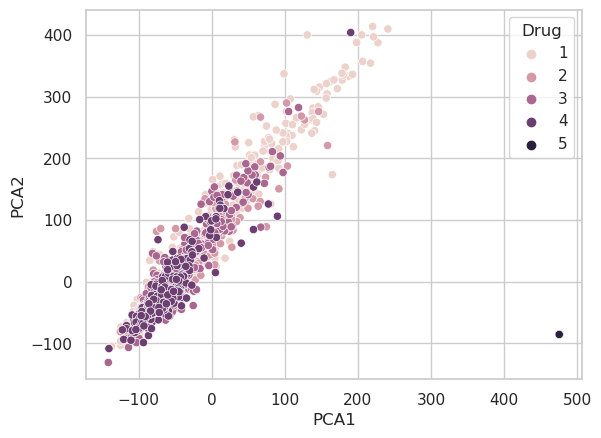

In [113]:
ax = sns.scatterplot(x = "PCA1", y = "PCA2", hue = 'Drug', data = pca_df)

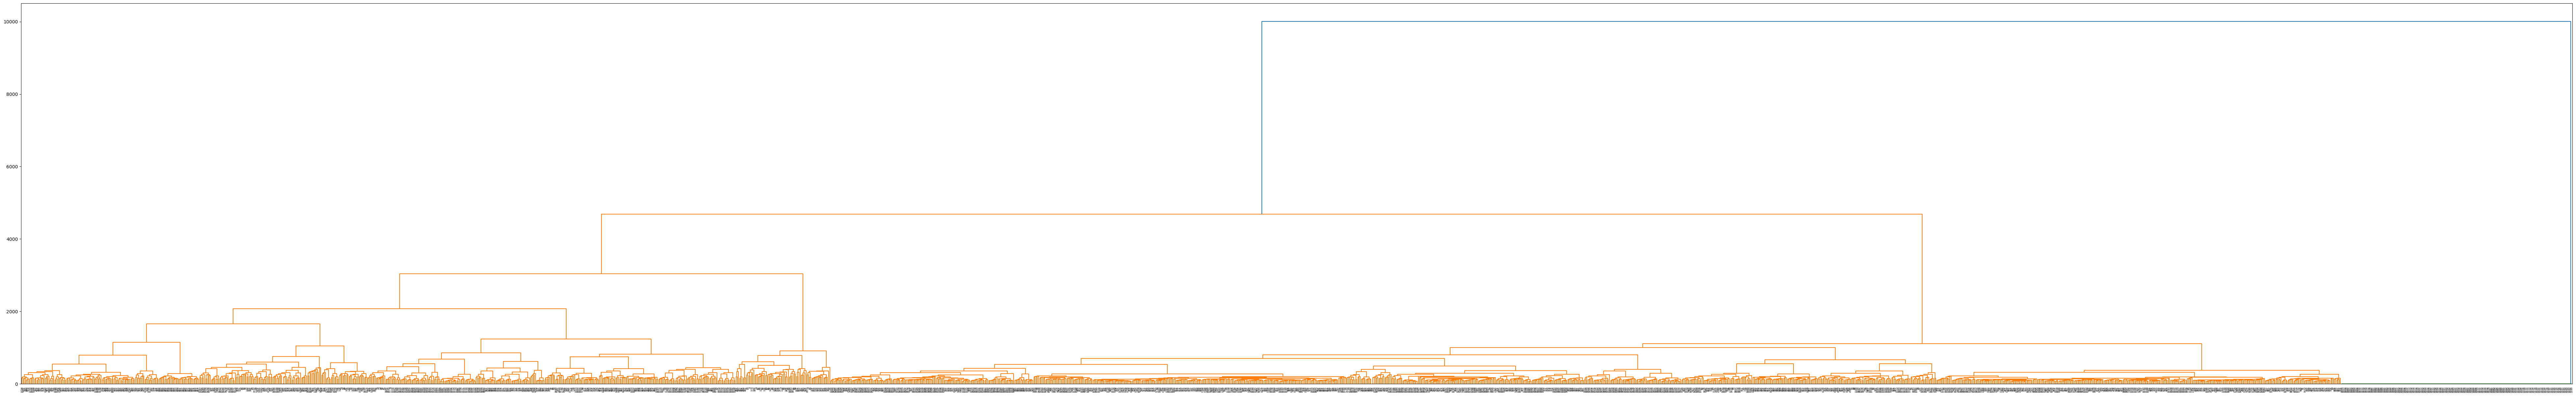

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(df, 'ward')

plt.figure(figsize=(100,15))

dendrogram(linked, orientation = 'top', distance_sort = "descending", show_leaf_counts = True)

plt.show()

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

cluster.fit_predict(df)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 4, 1, ..., 3, 3, 3])

In [95]:
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # create linkage matrix and plotting dendrogram
    # creating counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    



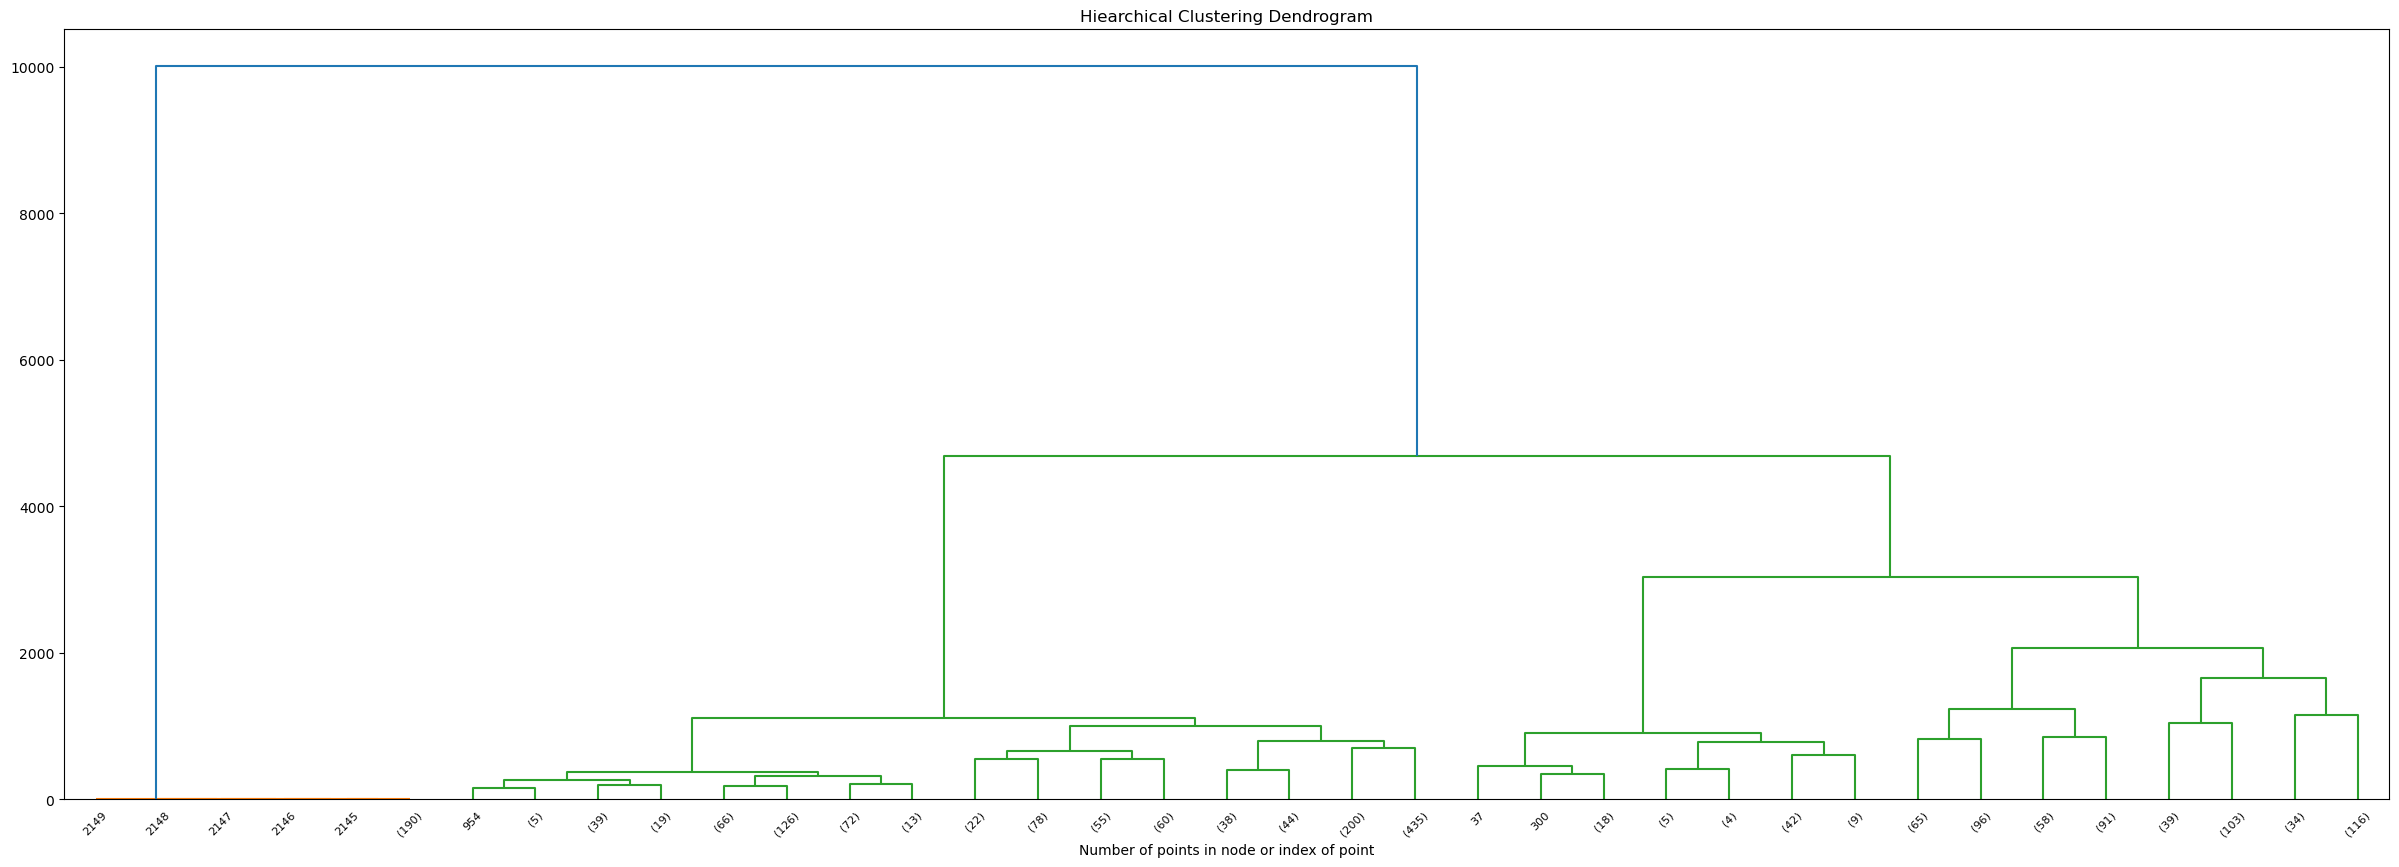

In [98]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)

model = model.fit(df)

plt.figure(figsize = (30, 10))
plt.title('Hiearchical Clustering Dendrogram')

plot_dendrogram(model, truncate_mode = 'level', p = 5)

plt.xlabel("Number of points in node or index of point")

plt.show()

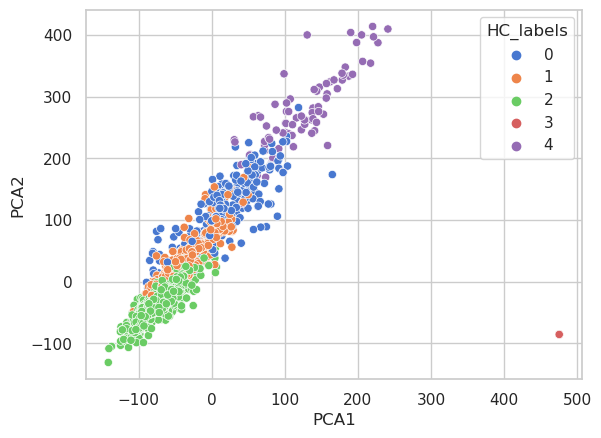

In [99]:
pca_df["HC_labels"] = cluster.labels_
pca_df['HC_labels'] = pca_df.HC_labels.astype('category')
sns.set(style = 'whitegrid', palette = 'muted')

ax  = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'HC_labels', data = pca_df)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


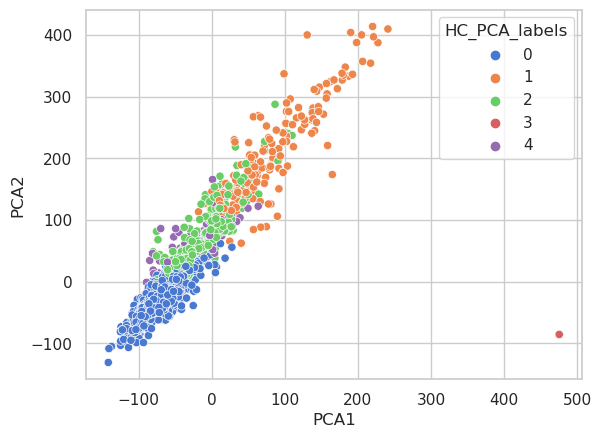

In [100]:
# this time compute PCA and then conduct hiearchical clustering on the PCA componenets (50 principal components here)


pca = PCA(n_components=50)
X = pca.fit(df).transform(df)


cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(X)

pca_df["HC_PCA_labels"] = cluster.labels_
pca_df['HC_PCA_labels'] = pca_df.HC_PCA_labels.astype('category')

sns.set(style = 'whitegrid', palette = 'muted')
ax = sns.scatterplot( x = 'PCA1', y = 'PCA2', hue = 'HC_PCA_labels', data = pca_df)

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


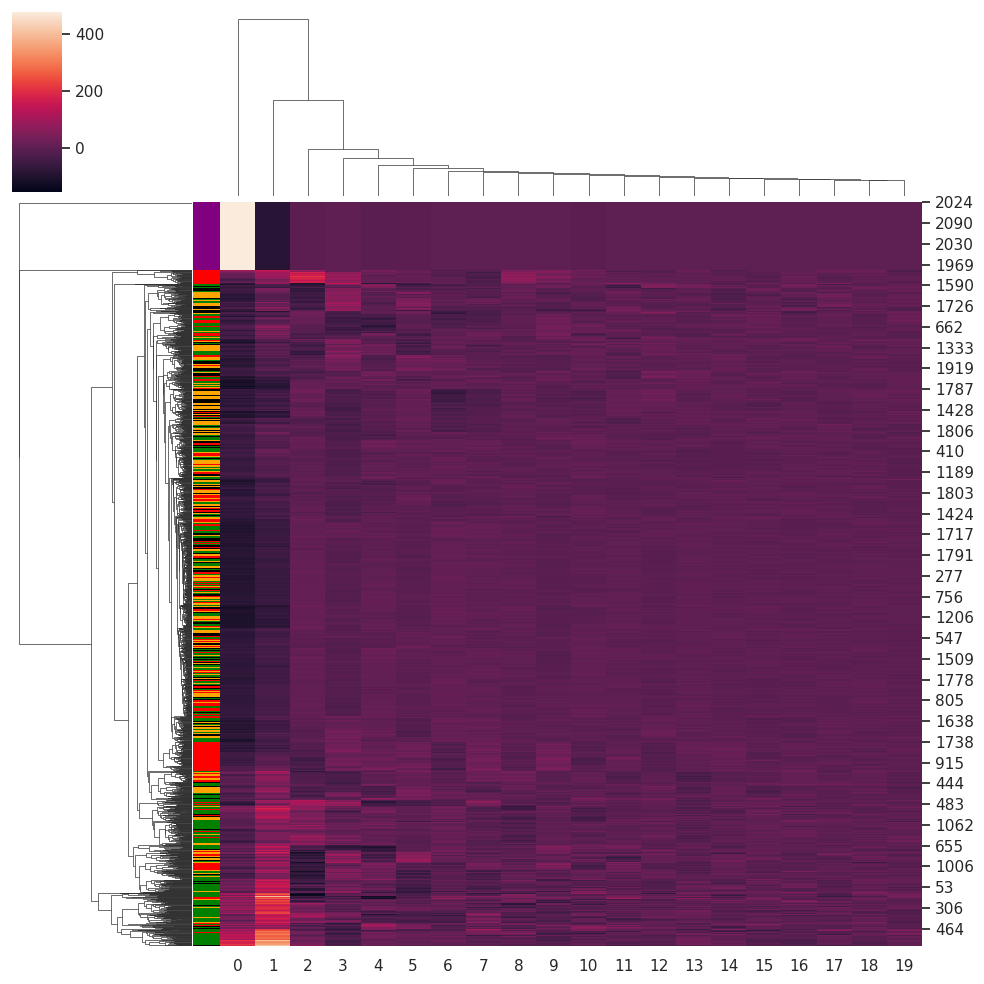

In [115]:
#need to do heatmap of common components

target = pd.Series(target)
pca = PCA(n_components = 20)

Y = pca.fit(df).transform(df)
Y = pd.DataFrame(Y)

k = ["green", "red", "orange", "black", "purple", "blue", "yellow"]

lut = dict(zip(target.unique(), k))
row_colors = target.map(lut)

g = sns.clustermap(Y, row_colors = row_colors)

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


kmeans=  KMeans(init = "random", n_clusters = 5, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(df)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)


31749139.749944564
[[ 2.09886476  1.1666497  -0.11998685 ...  2.06829657  1.33655564
  -0.89292228]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]
 [ 4.55384746  1.55437823 -1.83511971 ...  5.46498619  3.06245477
   0.18518509]
 [ 0.09587241 -0.09978675 -0.14770925 ... -0.05125963 -0.00921071
   0.07160392]
 [ 1.18213409  0.43363058 -1.56331884 ...  1.45493618  1.60876867
   0.39121908]]


AttributeError: 'KMeans' object has no attribute 'n_iter'

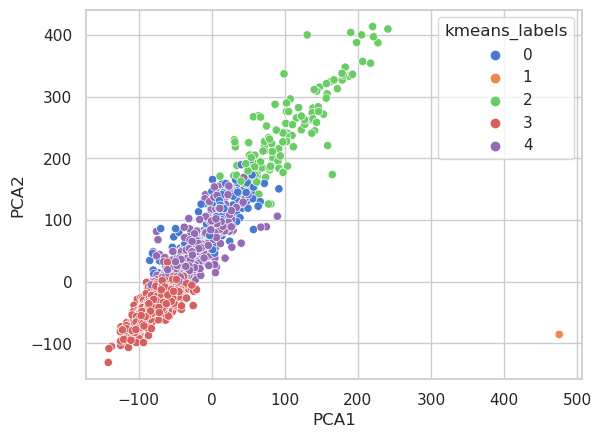

In [108]:
pca_df["kmeans_labels"] = kmeans.labels_
pca_df['kmeans_labels'] = pca_df.kmeans_labels.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'kmeans_labels', data = pca_df)

In [122]:
pca_df

x    y name  label        PCA1        PCA2  Drug
0     NaN  NaN  NaN      0  115.827568  265.463278     1
1     NaN  NaN  NaN      0   72.621585  212.427331     1
2     NaN  NaN  NaN      0  -28.422289   42.851033     1
3     NaN  NaN  NaN      0   52.685193  206.189836     1
4     NaN  NaN  NaN      0   31.915290  151.845418     1
...   ...  ...  ...    ...         ...         ...   ...
2145  NaN  NaN  NaN      4  475.565522  -85.704746     5
2146  NaN  NaN  NaN      4  475.565522  -85.704746     5
2147  NaN  NaN  NaN      4  475.565522  -85.704746     5
2148  NaN  NaN  NaN      4  475.565522  -85.704746     5
2149  NaN  NaN  NaN      4  475.565522  -85.704746     5

[2150 rows x 7 columns]

In [5]:
compound_df_5 = cparse.parse("/data3/balaji/cmap/level5_beta_trt_cp_n720216x12328.gctx")

In [6]:
compound_df_5 = compound_df_5.data_df

In [6]:
compound_df_5

cid    ABY001_A375_XH:BRD-A61304759:0.625:24  \
rid                                            
10                                  -0.02435   
100                                  0.70715   
1000                                -1.53065   
10000                               -0.69105   
10001                                0.79380   
...                                      ...   
9990                                 1.08165   
9991                                 1.47585   
9992                                -0.32150   
9993                                -0.18240   
9997                                -0.07220   

cid    ABY001_A375_XH:BRD-A61304759:0.625:3  \
rid                                           
10                                 0.296080   
100                               -0.855923   
1000                              -0.976824   
10000                             -2.368536   
10001                              0.836673   
...                                     ...   
9990                               0.704205   
9991                               0.752289   
9992                               0.300397   
9993                               1.697658   
9997                               0.649668   

cid    ABY001_A375_XH:BRD-A61304759:10:24  ABY001_A375_XH:BRD-A61304759:10:3  \
rid                                                                            
10                              -0.341348                           0.826170   
100                              1.393475                          -0.658590   
1000                            -0.938388                          -1.117790   
10000                            0.033532                          -1.195679   
10001                            0.776472                          -0.274785   
...                                   ...                                ...   
9990                             0.408181                           0.867923   
9991                            -0.884945                          -0.410739   
9992                            -0.092195                          -0.418060   
9993                             0.946795                           1.515939   
9997                             0.047901                           0.173782   

cid    ABY001_A375_XH:BRD-A61304759:2.5:24  \
rid                                          
10                                0.578998   
100                               1.990247   
1000                             -0.241152   
10000                            -0.269050   
10001                             0.458225   
...                                    ...   
9990                              1.087075   
9991                              0.739115   
9992                              1.426025   
9993                              0.334415   
9997                              0.143768   

cid    ABY001_A375_XH:BRD-A61304759:2.5:3  \
rid                                         
10                              -0.226271   
100                             -0.816748   
1000                            -0.236283   
10000                           -0.257835   
10001                            0.445442   
...                                   ...   
9990                            -0.409982   
9991                            -0.728025   
9992                            -0.274961   
9993                            -0.302074   
9997                             0.989755   

cid    ABY001_A375_XH:BRD-A90490067:0.625:24  \
rid                                            
10                                 -0.017583   
100                                -0.126917   
1000                                1.859383   
10000                               0.009758   
10001                              -0.515106   
...                                      ...   
9990                               -0.747536   
9991                                0.447379   
9992                                1.424459   
9993     

In [127]:
pd.set_option('display.max_columns', 37)

In [131]:
MCF7_siginfo = siginfo[siginfo['cell_iname'] == 'MCF7']
MCF7_siginfo_is_hiq = MCF7_siginfo[MCF7_siginfo['is_hiq'] == 1]

In [137]:
MCF7_siginfo_is_hiq_ids = MCF7_siginfo_is_hiq['sig_id'].tolist()

In [139]:
MCF7_siginfo_is_hiq_ids

['HDAC002_MCF7_6H:BRD-K54343811-001-01-1:10',
 'HDAC002_MCF7_6H:BRD-K29313308-001-02-4:5',
 'ERAM001_MCF7_24H:BRD-M90295809:8.9',
 'HOG001_MCF7_6H:BRD-A75409952-001-01-6:0.1235',
 'DOSBIO001_MCF7_24H:BRD-K08317416:10.1576',
 'POL001_MCF7_24H:F22',
 'OFL001_MCF7_96H:J17',
 'HOG003_MCF7_6H:BRD-K81418486-001-32-7:0.3704',
 'CPD002_MCF7_24H:BRD-K26104851-001-15-3:10',
 'CYT001_MCF7_4H:CMAP-CYT-C5993:50',
 'MET001_MCF7_XH:BRD-A19037878:10:24',
 'LPROT002_MCF7_6H:BRD-K07691486:10',
 'HOG002_MCF7_24H:BRD-A35588707-001-04-8:1.11',
 'PCL001_MCF7_24H:BRD-K88378636:1.11',
 'ENR001_MCF7_24H:G02',
 'POL001_MCF7_24H:A13',
 'POL001_MCF7_24H:P15',
 'HOG003_MCF7_6H:BRD-K22503835-001-06-0:3.33',
 'CPD002_MCF7_24H:BRD-K71289571-001-07-2:10',
 'CPD003_MCF7_24H:M21',
 'OFL001_MCF7_96H:J13',
 'POL001_MCF7_24H:N15',
 'HDAC001_MCF7_24H:BRD-K88742110-001-01-2:2.5',
 'CYT001_MCF7_4H:CMAP-CYT-SRP3055:100',
 'HOG002_MCF7_24H:BRD-A61304759-001-01-0:1.11',
 'PCL001_MCF7_24H:BRD-K92428232:10',
 'ERAM001_MCF7_24H:BRD

In [142]:
MCF7_siginfo_is_hiq_ids_in_df = []
for i in MCF7_siginfo_is_hiq_ids:
    if i in compound_df_5.columns:
        MCF7_siginfo_is_hiq_ids_in_df.append(i)


In [144]:
len(MCF7_siginfo_is_hiq_ids_in_df)

12680

In [184]:
kmeans_df_MCF7 = compound_df_5[MCF7_siginfo_is_hiq_ids_in_df]

In [150]:
kmeans=  KMeans(init = "random", n_clusters = 5, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(kmeans_df_MCF7)

print(kmeans.inertia_)
print(kmeans.cluster_centers_)


122834208.0
[[-0.07617262 -0.14361192  0.0324211  ... -0.0746347  -0.04097983
  -0.52167517]
 [ 0.5192836   0.17032424 -0.427235   ... -0.360938   -0.2906102
   0.95788074]
 [ 0.07916175 -0.10548466 -0.09172633 ...  0.14046732  0.01523905
   0.21793944]
 [ 0.25159782  0.09037998 -0.1492966  ... -0.15169996 -0.09835628
   0.4469031 ]
 [-0.11699963  0.1141773   0.01475146 ... -0.52683663 -0.20746522
  -1.0447333 ]]


In [153]:
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [154]:
# just clustered by gene

kmeans_df_MCF7['predictions'] = kmeans.labels_

/tmp/ipykernel_21449/3549588302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeans_df_MCF7['predictions'] = kmeans.labels_


In [183]:
kmeans_df_MCF7

array([[ 0.91928695,  0.3434435 , -0.56104705, ...,  0.17847122,
         0.41581541, -0.56502745],
       [ 0.18576426, -0.04538162,  0.16411247, ..., -0.44849518,
        -0.10604291, -0.56502745],
       [-0.60029318, -0.65209505,  0.44540761, ...,  1.65692957,
        -1.29242877, -1.41377344],
       ...,
       [ 0.27133873, -0.5496172 ,  0.59305582, ..., -0.73995651,
         0.86575166, -0.56502745],
       [ 0.33545627, -0.82134496,  0.74325019, ..., -1.74261119,
         1.35388996, -0.56502745],
       [-0.06171823,  1.40498109, -0.52198808, ..., -1.00774507,
         0.34552156, -1.41377344]])

In [ ]:
# need to do PCA first, can't just do kmeans because then I choose choose two genes randomly

In [157]:
from sklearn.preprocessing import StandardScaler

kmeans_df_MCF7 = StandardScaler().fit_transform(kmeans_df_MCF7)

In [158]:
kmeans_df_MCF7

array([[ 0.91928695,  0.3434435 , -0.56104705, ...,  0.17847122,
         0.41581541, -0.56502745],
       [ 0.18576426, -0.04538162,  0.16411247, ..., -0.44849518,
        -0.10604291, -0.56502745],
       [-0.60029318, -0.65209505,  0.44540761, ...,  1.65692957,
        -1.29242877, -1.41377344],
       ...,
       [ 0.27133873, -0.5496172 ,  0.59305582, ..., -0.73995651,
         0.86575166, -0.56502745],
       [ 0.33545627, -0.82134496,  0.74325019, ..., -1.74261119,
         1.35388996, -0.56502745],
       [-0.06171823,  1.40498109, -0.52198808, ..., -1.00774507,
         0.34552156, -1.41377344]])

In [186]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .3)
principalComponents = pca.fit_transform(kmeans_df_MCF7)


In [187]:
pca.explained_variance_ratio_

array([0.25091422, 0.10630505], dtype=float32)

In [ ]:
len(pca.components_[0])

12681

In [188]:
pca_df = pd.DataFrame()
pca_df['PCA1'] = pca.components_[0]
pca_df['PCA2'] = pca.components_[1]
pca_df["kmeans_labels"] = kmeans.labels_
pca_df['kmeans_labels'] = pca_df.kmeans_labels.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'kmeans_labels', data = pca_df)

ValueError: Length of values (12328) does not match length of index (12680)

In [146]:
def graphScatter(x, y, title = ""):

    plt.rcParams.update({'font.size': 22})

    
    plt.axhline(0, color='black', linestyle='-')
    plt.axvline(0, color='black', linestyle='-')
    plt.scatter(x, y, s= 10, alpha = 0.05)

    corr = np.corrcoef(x, y)[0, 1]
    
    m, b = np.polyfit(x, y, deg=1)
    # if cluster == False:
    #     plt.text(0.75, 0.95, f'Correlation: {corr:.2f}', ha='center', va='top', transform=plt.gca().transAxes)
    #     plt.plot(x, m*x + b, color='red')

    #     plt.text(0.75, 0.85, f'Slope of Line of Best Fit: {m:.2f}', ha='center', va='top', transform=plt.gca().transAxes)
    #     plt.text(0.75, 0.80, f'y-intercept: {b:.2f}', ha='center', va='top', transform=plt.gca().transAxes)

    plt.scatter(x, y, s= 10, alpha = 0.2, color = 'darkblue')

    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    plt.xlabel(f"{x.columns}")
    plt.ylabel(f"{y.columns}")

    plt.title(f"{title}")
    plt.rcParams.update({'font.size': 22})

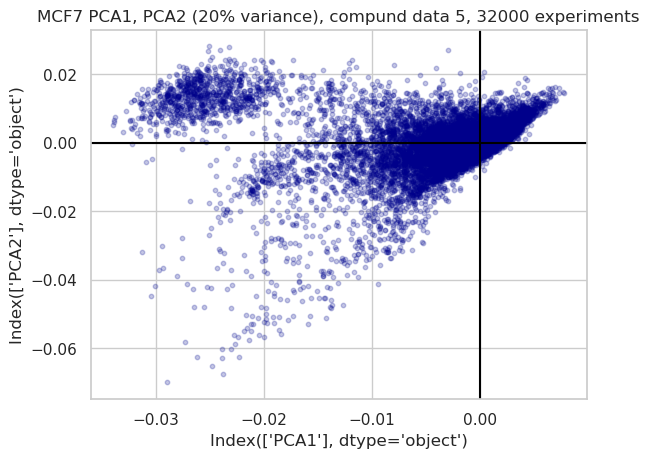

In [193]:
graphScatter(x= pca_df.iloc[:,0], y = pca_df.iloc[:,1], title = "MCF7 PCA1, PCA2 (20% variance), compund data 5, 32000 experiments")

InvalidIndexError: (slice(None, None, None), slice(None, 2, None))

In [242]:
kmeans=  KMeans(init = "random", n_clusters = 3, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(pca_df.iloc[:,:2])

print(kmeans.inertia_)
print(kmeans.cluster_centers_)


0.6214446425437927
[[-0.02331895  0.0131386 ]
 [-0.01068185 -0.01537795]
 [-0.00118775  0.00118545]]


In [243]:
pca_df['predictions'] = kmeans.labels_

In [244]:
pca_df

PCA1      PCA2  predictions
0     -0.002785 -0.005348            2
1     -0.000622 -0.003368            2
2      0.001913  0.003246            2
3     -0.004695 -0.011358            1
4      0.000786  0.002013            2
...         ...       ...          ...
12675 -0.000144 -0.000201            2
12676  0.001168  0.003967            2
12677 -0.000654  0.005516            2
12678  0.000234  0.003057            2
12679 -0.008681 -0.010024            1

[12680 rows x 3 columns]

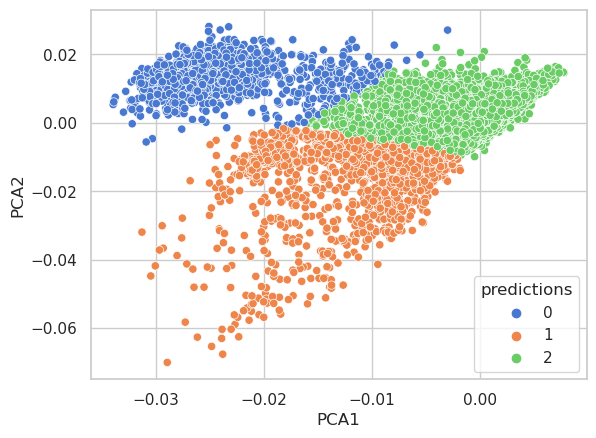

In [245]:
pca_df['predictions'] = pca_df.predictions.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predictions', data = pca_df)

In [219]:
pca_df_elbow_method = pca_df.iloc[:,:2]


/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

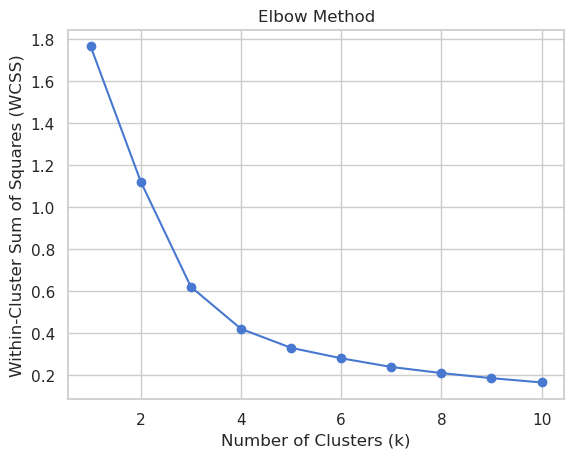

In [220]:
k_values = range(1, 11)

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df_elbow_method)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [246]:
pca_df

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

In [251]:
kmean_df_MCF7_genes_columns = kmeans_df_MCF7.transpose()

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .3)
principalComponents = pca.fit_transform(kmean_df_MCF7_genes_columns)

In [256]:
pca.explained_variance_ratio_

array([0.22854196, 0.12051726], dtype=float32)

In [257]:
pca_df_ge

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

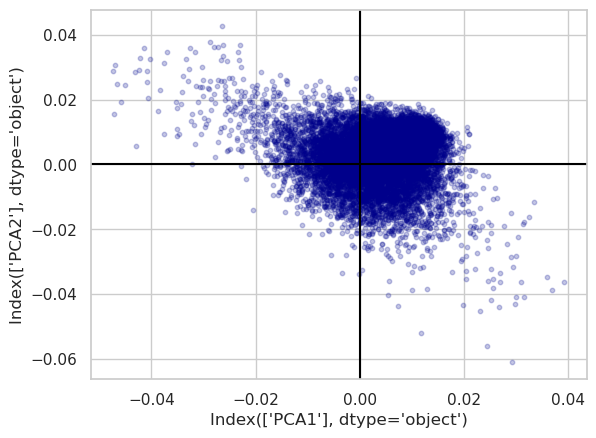

In [261]:
pca_df_transpose = pd.DataFrame()
pca_df_transpose['PCA1'] = pca.components_[0]
pca_df_transpose['PCA2'] = pca.components_[1]
graphScatter(x= pca_df_transpose.iloc[:,0], y = pca_df_transpose.iloc[:,1])

In [259]:
pca_df_transpose

PCA1      PCA2
0      0.010130  0.007221
1      0.011009  0.000286
2     -0.000923 -0.004533
3      0.004542  0.010416
4     -0.000834 -0.014441
...         ...       ...
12323  0.014242 -0.004805
12324 -0.003417 -0.011698
12325  0.010334  0.008958
12326  0.011346  0.005390
12327 -0.002271  0.005664

[12328 rows x 2 columns]

In [260]:
pca_df

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

In [265]:
pca_250000 = PCA(n_components = 2)
principalComponents = pca_250000.fit_transform(compound_df_5.iloc[:,:25000])


In [266]:
pca_250000.explained_variance_ratio_

array([0.23849578, 0.03706753], dtype=float32)

In [272]:
pca_250000.components_

array([[-2.4423527e-03, -2.6894428e-03, -3.0598147e-03, ...,
         2.4977950e-03,  1.7169779e-03,  3.7461836e-04],
       [ 1.6759265e-03,  1.0247867e-03,  5.4292097e-03, ...,
         8.8818902e-05, -2.3531901e-04, -2.8865696e-03]], dtype=float32)

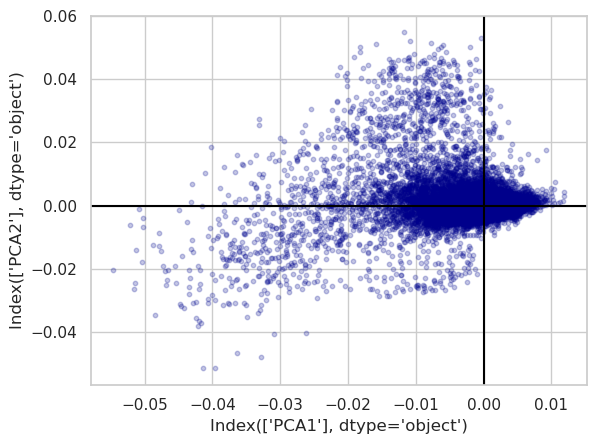

In [276]:
first_25000_pca = pd.DataFrame()
first_25000_pca['PCA1'] = pca_250000.components_[0]
first_25000_pca['PCA2'] = pca_250000.components_[1]
graphScatter(x=first_25000_pca.iloc[:,0], y= first_25000_pca.iloc[:,1])

In [309]:
all_cp_pca_standardized = StandardScaler().fit_transform(compound_df_5.iloc[:,:].transpose())

In [306]:
all_cp_pca_standardized

PCA1      PCA2
0      0.011495 -0.004112
1      0.004206  0.001086
2     -0.007223  0.000838
3      0.004688 -0.004820
4     -0.004359  0.016378
...         ...       ...
12323  0.013665  0.010751
12324 -0.002708  0.004600
12325  0.015765 -0.007301
12326  0.009226 -0.001471
12327  0.000923 -0.007537

[12328 rows x 2 columns]

In [310]:
pca_all = PCA(n_components = 2)
principalComponents = pca_all.fit_transform(all_cp_pca_standardized)

In [311]:
pca_all.explained_variance_ratio_

array([0.22544606, 0.03205985])

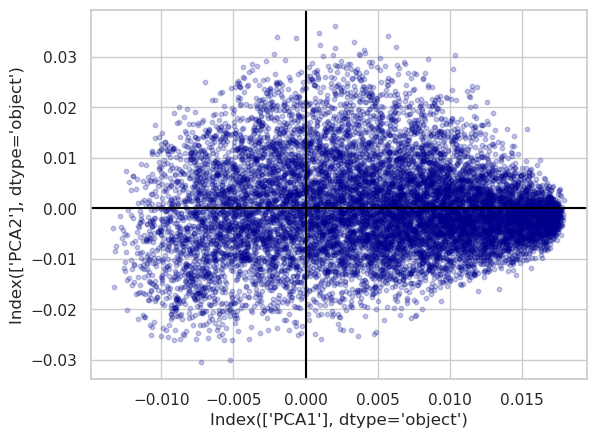

In [312]:
pca_all_stdrzed = pd.DataFrame()
pca_all_stdrzed['PCA1'] = pca_all.components_[0]
pca_all_stdrzed['PCA2'] = pca_all.components_[1]
graphScatter(x=pca_all_stdrzed.iloc[:,0], y= pca_all_stdrzed.iloc[:,1])

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

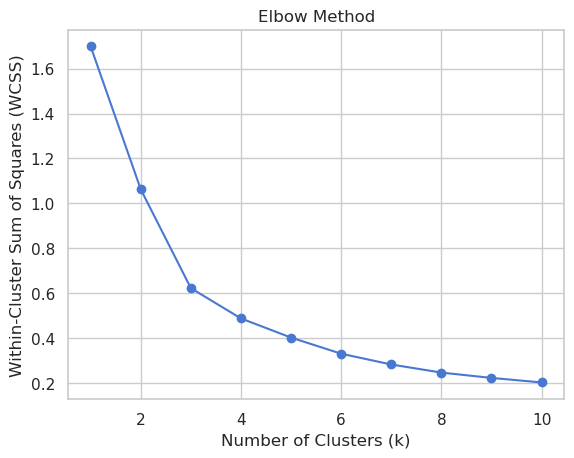

In [313]:
k_values = range(1, 11)

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_all_stdrzed)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

In [320]:
kmeans=  KMeans(init = "random", n_clusters = 50, n_init = 10, max_iter = 300, random_state = 42)
kmeans.fit_predict(pca_all_stdrzed.iloc[:,:2])

print(kmeans.inertia_)
print(kmeans.cluster_centers_)

0.04237040504813194
[[ 9.8481327e-03 -3.1946304e-03]
 [-9.6321404e-03 -4.4906307e-03]
 [-7.1050045e-03 -2.1509711e-02]
 [-4.3143160e-03 -9.7725680e-03]
 [-1.9663363e-03 -6.1316025e-03]
 [ 6.1204755e-03  2.5460662e-03]
 [ 1.6370656e-02 -2.9038731e-03]
 [-1.2085428e-03 -4.5940190e-04]
 [-8.0265291e-03 -1.5367073e-02]
 [ 9.9222045e-03  1.0579491e-02]
 [-2.8030775e-03  1.1691611e-02]
 [ 1.1215666e-03  2.9035327e-03]
 [ 1.3070576e-02 -8.9960191e-03]
 [ 1.6478619e-02 -2.0618150e-05]
 [-7.0344466e-03  7.9285558e-03]
 [ 1.4476854e-02  2.7368928e-03]
 [ 6.2053986e-03  2.1927465e-02]
 [-7.2284178e-03  1.3996080e-02]
 [ 9.4386227e-03 -7.2097648e-03]
 [ 5.9848558e-04 -1.9958334e-02]
 [-8.6485073e-03  2.5254372e-03]
 [ 9.5343459e-03  1.5719144e-02]
 [ 5.6819953e-03 -9.5764343e-03]
 [-1.8702117e-03  2.2143435e-02]
 [ 3.7475792e-03 -9.6665847e-04]
 [ 3.6625941e-03  1.6535522e-02]
 [ 1.3230553e-02  7.0512313e-03]
 [-5.6898962e-03 -5.7274982e-04]
 [ 1.0458389e-02  3.7797603e-03]
 [ 5.2122315e-03 -1.477

In [321]:
pca_all_stdrzed['predictions'] = kmeans.labels_

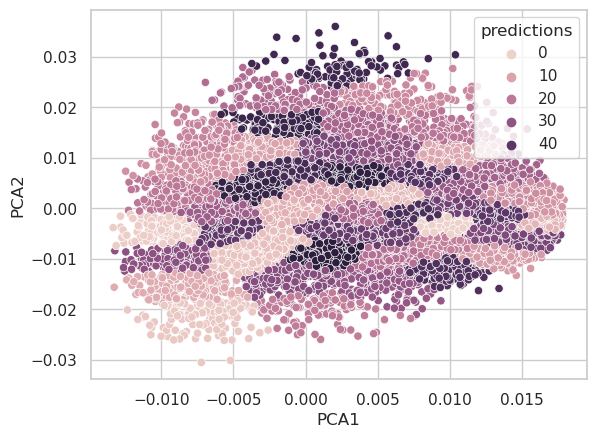

In [322]:
pca_df['predictions'] = pca_df.predictions.astype('category')
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predictions', data = pca_all_stdrzed)

In [3]:
siginfo_pert = siginfo[siginfo['pert_type'] == 'trt_cp']

In [7]:
# what if I only look at high quality data?

siginfo_is_hiq_all = siginfo_pert[siginfo_pert['is_hiq'] == 1]
list_of_all_sig = siginfo_is_hiq_all['sig_id'].tolist()

In [8]:
compound_hiq_data = compound_df_5[list_of_all_sig]

In [9]:
compound_hiq_data_10000 = compound_hiq_data.iloc[:,:10000]

In [ ]:
compound_hiq_data_standardized = StandardScaler().fit_transform(compound_hiq_data)

In [10]:
compound_df_5_hiq_corr = pd.DataFrame(np.corrcoef(compound_hiq_data_10000.values, rowvar=False), columns=compound_hiq_data_10000.columns)

In [11]:
pca = PCA(n_components = 50)
principalComponents = pca.fit_transform(compound_df_5_hiq_corr)

In [12]:
tsne_pca_df_exp = pd.DataFrame()
for i in range(len(pca.components_)):
    tsne_pca_df_exp[f'PCA{i}'] = pca.components_[i]

In [13]:
tsne_pca_df_exp

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0    -0.012453 -0.003579  0.000567 -0.011509 -0.003674 -0.000350 -0.012423   
1     0.004808 -0.019886 -0.017617  0.019094 -0.004854  0.003354 -0.006461   
2    -0.003054 -0.017753  0.000981 -0.014889 -0.003210 -0.010638 -0.006161   
3    -0.001641 -0.023494  0.004896 -0.019752 -0.003492 -0.010095 -0.015690   
4     0.008116 -0.004885 -0.004588 -0.002196 -0.001160  0.000086  0.012258   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.010383 -0.017111  0.008237 -0.004039  0.003463 -0.002913 -0.003445   
9996  0.012210 -0.005642 -0.007347 -0.004402  0.017381  0.001124 -0.003193   
9997  0.010178 -0.011807  0.000231 -0.009283  0.023135 -0.000992 -0.007503   
9998 -0.003822 -0.025597 -0.016842  0.015294  0.002214 -0.008115 -0.003722   
9999  0.007506 -0.012437 -0.021497  0.023341 -0.010414  0.010437 -0.001615   

          PCA7      PCA8      PCA9  ...     PCA40     PCA41     PCA42  \
0     0.007059  0.007969 -0.013056  ... -0.004301  0.002462 -0.006738   
1     0.002336  0.005813  0.006114  ... -0.005837 -0.010903 -0.009561   
2     0.002542 -0.007234  0.003957  ... -0.001713  0.008504 -0.000709   
3     0.009726 -0.007691  0.013594  ...  0.005673  0.002736 -0.004560   
4    -0.012630 -0.000784 -0.010046  ...  0.005760  0.012116  0.005144   
...        ...       ...       ...  ...       ...       ...       ...   
9995 -0.013213 -0.006018 -0.001527  ... -0.008104 -0.005070  0.009979   
9996 -0.004712 -0.009091  0.012085  ... -0.011174 -0.013686  0.015376   
9997  0.003006 -0.008674  0.002326  ... -0.012548 -0.018004 -0.006962   
9998 -0.012300  0.016723 -0.012860  ...  0.002762 -0.013747  0.013935   
9999  0.001239  0.015569  0.000430  ... -0.007016  0.007011 -0.002474   

         PCA43     PCA44     PCA45     PCA46     PCA47     PCA48     PCA49  
0    -0.006755  0.008866 -0.009518  0.005435 -0.006335  0.003901  0.001921  
1     0.003018 -0.000755  0.007246  0.009271  0.005723 -0.011319  0.005154  
2     0.000486  0.004817  0.012483  0.011946  0.001395 -0.007447 -0.015121  
3    -0.009937 -0.002301 -0.003237 -0.005818  0.001602  0.000727  0.009196  
4    -0.012586 -0.011349 -0.003032  0.000590 -0.009972 -0.004903  0.005246  
...        ...       ...       ...       ...       ...       ...       ...  
9995  0.001700 -0.006054 -0.011798 -0.002140 -0.002161 -0.010284 -0.005322  
9996  0.003335 -0.000067  0.001496  0.002292  0.012743 -0.004494 -0.019669  
9997 -0.012852 -0.006549  0.004388  0.002436 -0.006923 -0.004630  0.002626  
9998  0.000603  0.002413 -0.008163 -0.010622  0.003070  0.005951  0.001491  
9999 -0.013611  0.002987  0.006926 -0.002275  0.002696 -0.016169 -0.004829  

[10000 rows x 50 columns]

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, n_iter = 2000)
tsne_results = tsne.fit_transform(tsne_pca_df_exp.iloc[:,:50])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.989s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.021181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.527473
[t-SNE] KL divergence after 2000 iterations: 2.701577


/tmp/ipykernel_11560/1581072022.py:7: UserWarning: 
The palette list has fewer values (10) than needed (50) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

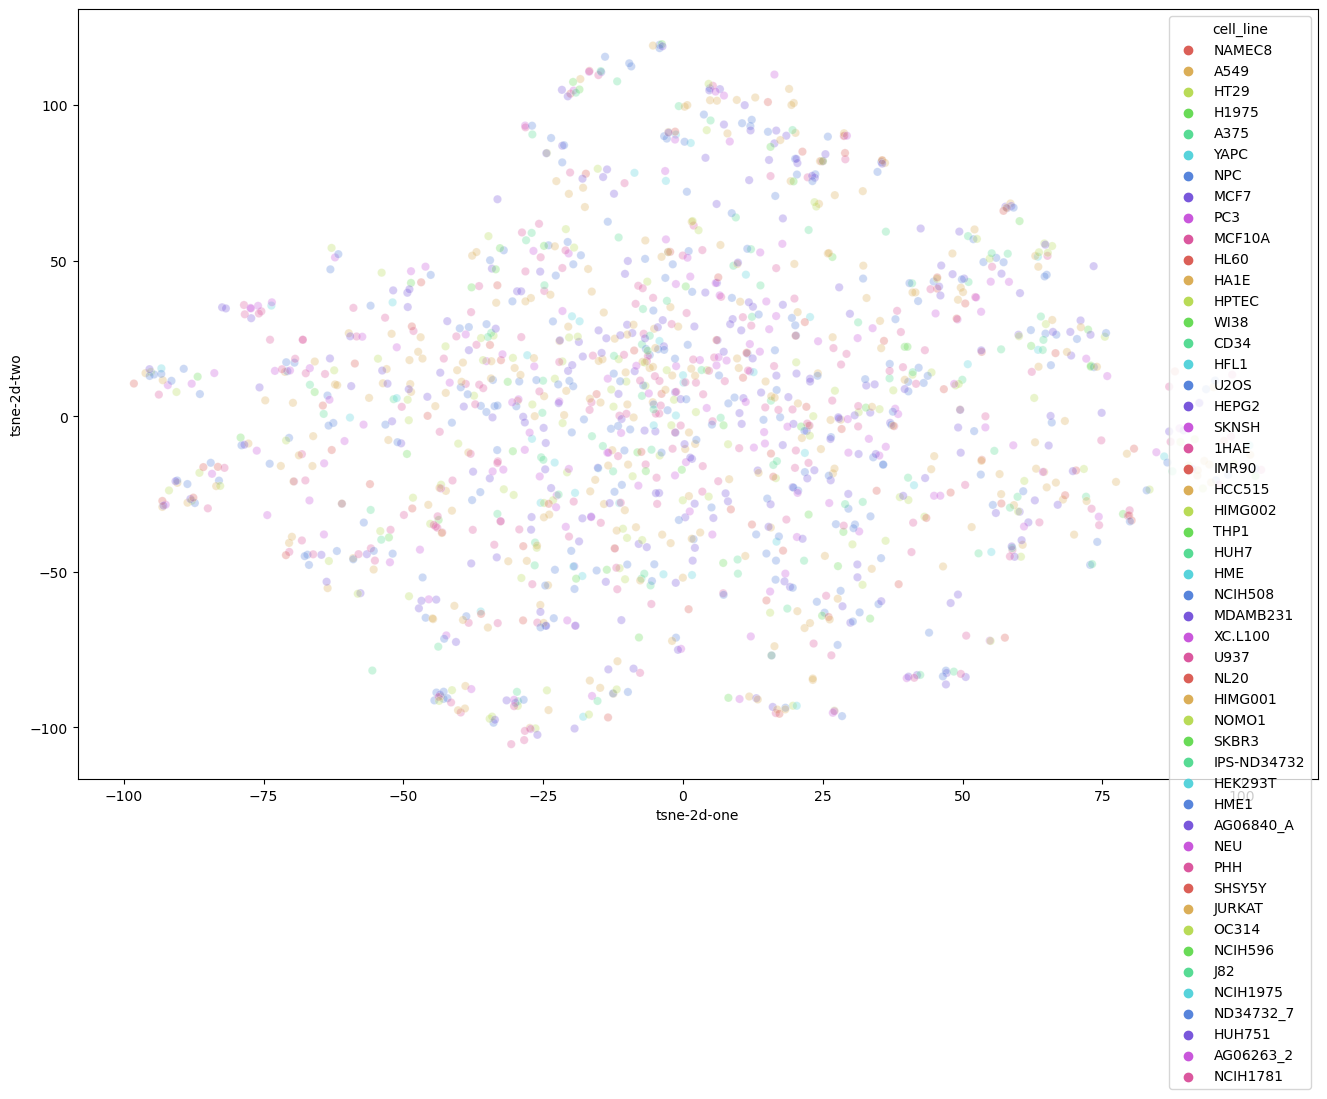

In [21]:
tsne_results_df = pd.DataFrame()
tsne_results_df['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df['tsne-2d-two'] = tsne_results[:,1]
tsne_results_df['cell_line'] = siginfo_is_hiq_all.iloc[:,:10000]['cell_iname']

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    hue = 'cell_line',
    data=tsne_results_df,
    legend="full",
    alpha=0.3
)

In [32]:
compound_hiq_data.columns[compound_hiq_data.columns == siginfo_is_hiq_all['sig_id']].value_counts()

MET001_N8_XH:BRD-U44432129:100:336             1
REP.A021_JURKAT_24H:E04                        1
REP.A005_XC.L10_24H:C13                        1
REP.A003_XC.L10_24H:O11                        1
REP.B003_HELA_24H:H08                          1
                                              ..
DOS020_VCAP_24H:BRD-K95779464-001-01-7:5.03    1
DOS019_VCAP_24H:BRD-K64478813-001-01-1:4.9     1
DOS018_VCAP_24H:BRD-K44755254-001-01-3:5       1
DOS015_VCAP_24H:BRD-K55078218-001-01-1:5.06    1
DOSVAL001_HCC515_24H:BRD-K90382497:10          1
Name: cid, Length: 126048, dtype: int64

In [7]:
def write_dataframe_to_csv(dataframe, filename):
    import csv

    dataframe.to_csv(filename, index=False)

In [154]:
write_dataframe_to_csv(compound_df_5_hiq_corr, '/home/ndjed/Programs/VSCode/corr_hiq_cp_5.csv')

KeyboardInterrupt: 

In [150]:
compound_df_5_hiq_corr.iloc[:10000,:10000]

cid   MET001_N8_XH:BRD-U44432129:100:336  ABY001_A549_XH:BRD-K81418486:10:3  \
0                               1.000000                          -0.078044   
1                              -0.078044                           1.000000   
2                               0.148737                           0.056266   
3                               0.145052                           0.118980   
4                              -0.100515                           0.129706   
...                                  ...                                ...   
9995                           -0.126108                           0.129235   
9996                           -0.170363                           0.096740   
9997                           -0.030221                           0.046874   
9998                            0.081802                           0.336016   
9999                           -0.081264                           0.416789   

cid   ABY001_HT29_XH:BRD-K70511574:2.5:24  \
0                                0.148737   
1                                0.056266   
2                                1.000000   
3                                0.424110   
4                                0.018642   
...                                   ...   
9995                             0.149068   
9996                             0.024724   
9997                             0.120714   
9998                             0.154527   
9999                             0.031370   

cid   ABY001_H1975_XH:BRD-K85606544:10:24  LPROT002_A375_6H:BRD-A55453956:0.1  \
0                                0.145052                           -0.100515   
1                                0.118980                            0.129706   
2                                0.424110                            0.018642   
3                                1.000000                           -0.016203   
4                               -0.016203                            1.000000   
...                                   ...                                 ...   
9995                             0.214039                            0.113688   
9996                             0.028084                            0.117586   
9997                             0.165583                            0.133648   
9998                             0.185276                            0.058975   
9999                             0.036195                            0.106200   

cid   LPROT004_YAPC_6H:BRD-K83189926:1  \
0                             0.014838   
1                            -0.227279   
2                            -0.107050   
3                            -0.150633   
4                            -0.118132   
...                                ...   
9995                         -0.163985   
9996                         -0.190200   
9997                         -0.116765   
9998                         -0.174339   
9999                         -0.169075   

cid   LPROT002_NPC.TAK_6H:BRD-K86787118:0.05  \
0                                  -0.118893   
1                                   0.097088   
2                                  -0.039606   
3                                   0.000648   
4                                   0.185597   
...                                      ...   
9995                                0.196178   
9996                                0.136831   
9997                                0.075716   
9998                                0.012261   
9999                                0.078312   

cid   HDAC002_MCF7_6H:BRD-K54343811-001-01-1:10  \
0                                      0.141814   
1                                     -0.049697   
2                                     -0.059835   
3                                     -0.093171   
4                                     -0.142824   
...                                         ...   
9995                                  -0.207280   
9996                                  -0.203939

In [162]:
reducer = umap.UMAP(n_neighbors = 24, min_dist = 0.1, metric = 'correlation', random_state = 42)
embedding = reducer.fit_transform(compound_hiq_data.iloc[:,:].transpose())

In [164]:
UMAP_df = pd.DataFrame()
UMAP_df['UMAP1'] = embedding[:,0]
UMAP_df['UMAP2'] = embedding[:,1]
UMAP_df.index = siginfo_is_hiq_all.index
UMAP_df['cell_line'] = siginfo_is_hiq_all['cell_mfc_name']

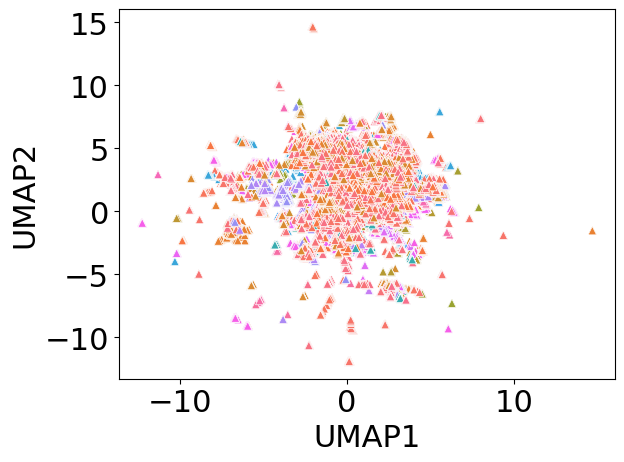

In [170]:
ax = sns.scatterplot(x = UMAP_df['UMAP1'],  y = UMAP_df['UMAP2'] , marker = '^', hue = 'cell_line', data = UMAP_df, legend = False)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


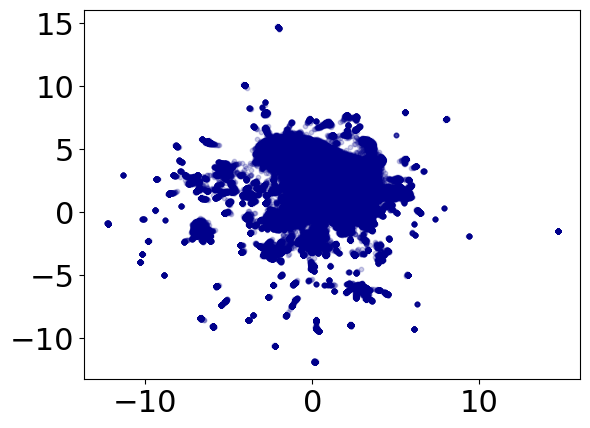

In [163]:

plt.scatter(x= embedding[:,0], y = embedding[:,1],s= 10, alpha = 0.2, color = 'darkblue')

In [143]:
"Takes in dataframe for clustering and returns graph of PCA 1, 2 as well as elbow curve for optimal clusters"
def preKMeansClustering(df):
    # df_standardized = StandardScaler().fit_transform(df)
    pca = PCA(n_components = 50)
    principalComponents = pca.fit_transform(df)
    print("Variance for PCA: ", pca.explained_variance_ratio_)
    
    pca_df = pd.DataFrame()
    pca_df['PCA1'] = pca.components_[0]
    pca_df['PCA2'] = pca.components_[1]
    print(graphScatter(x=pca_df.iloc[:,0], y= pca_df.iloc[:,1]))

    # elbow curve

    k_values = range(1, 11)

    # Initialize an empty list to store the WCSS values for each cluster number
    wcss_values = []

    # Iterate over each cluster number and calculate WCSS
    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pca_df)
        wcss_values.append(kmeans.inertia_)

    # Plot the WCSS values against the number of clusters
    plt.plot(k_values, wcss_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method')
    plt.show()

    return pca_dffrom sklearn.manifold import TSNE
    

    
    
    

Variance for PCA:  [0.66259691 0.10516477 0.03893808 0.03181821 0.01997436 0.01473085
 0.01348247 0.00948021 0.00616833 0.00557939 0.00491435 0.00450377
 0.00417304 0.0038381  0.00323906 0.00302248 0.00261023 0.00248351
 0.00214194 0.00198225 0.0018593  0.00167785 0.00148833 0.00141222
 0.00136465]
None


NameError: name 'KMeans' is not defined

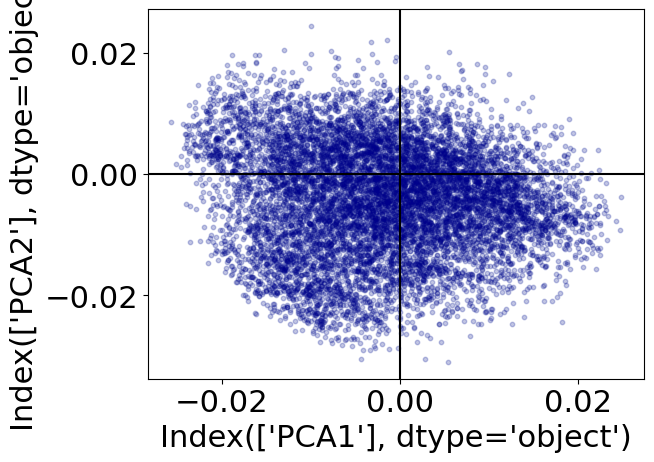

In [151]:
pca_hiq_df = preKMeansClustering(compound_df_5_hiq_corr.iloc[:10000,:10000])

In [ ]:
ax = sns.scatter(plot(x = 'PCA1', y = 'PCA2', hue = 'cell_name', data = ))

In [357]:
# Peforms kMeansClustering. Needs df with PCA values and number of clusters.
def kMeansClustering(pca_df, num_clusters = 3):
    kmeans=  KMeans(init = "random", n_clusters = num_clusters, n_init = 10, max_iter = 300, random_state = 42)
    kmeans.fit_predict(pca_df.iloc[:,:2])
    temp_df = pca_df
    temp_df['predictions'] = kmeans.labels_

    temp_df['predictions'] = temp_df.predictions.astype('category')
    ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predictions', data = temp_df)

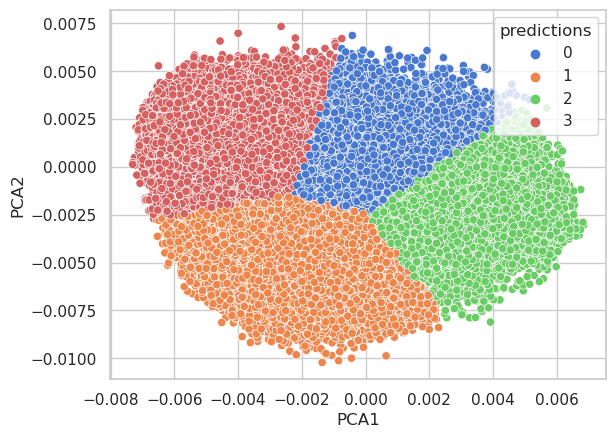

In [358]:
kMeansClustering(pca_hiq_df)

In [6]:
# lets use t-SNE instead of PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
tsne_results = tsne.fit_transform(pca_df)


NameError: name 'pca_df' is not defined

/tmp/ipykernel_21449/3255504409.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

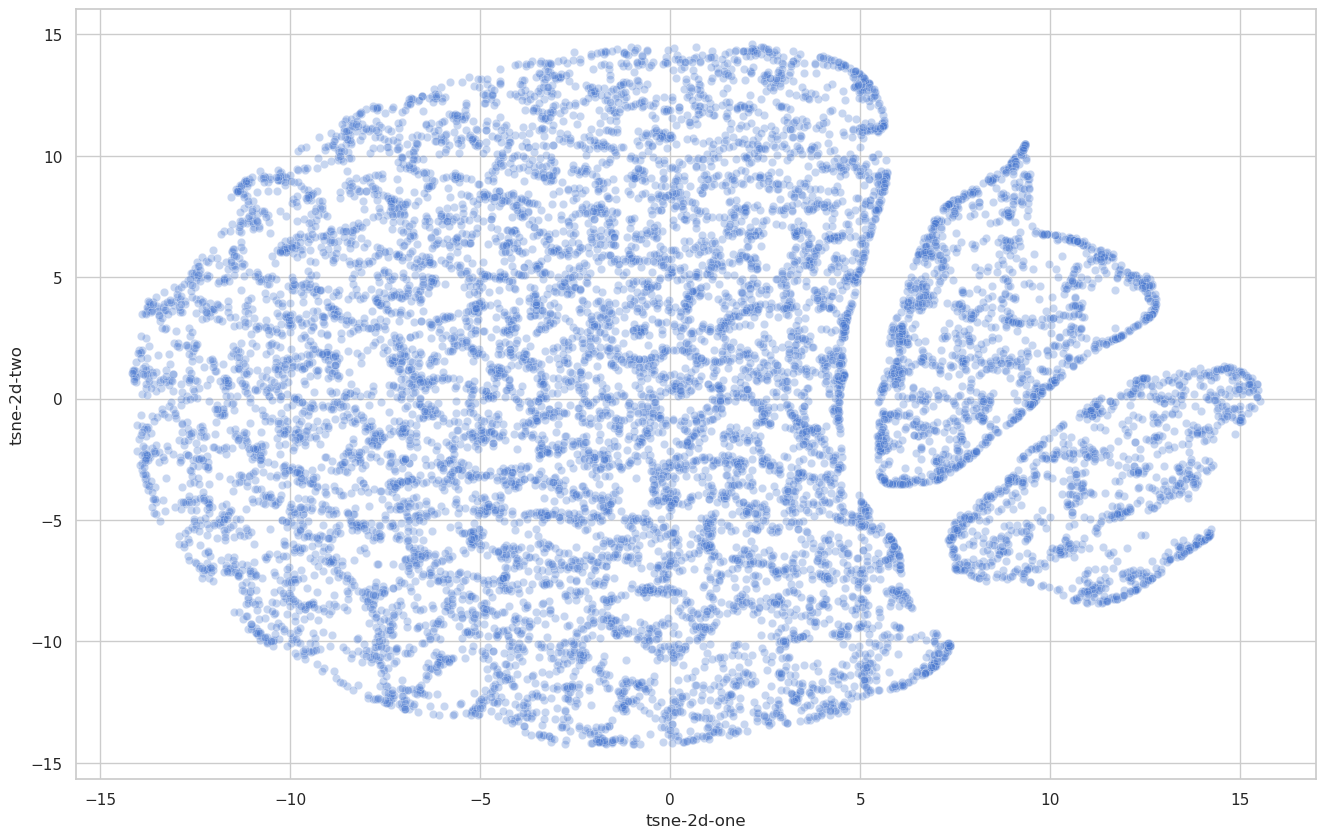

In [380]:
tsne_results_df = pd.DataFrame()
tsne_results_df['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_df,
    legend="full",
    alpha=0.3
)

In [395]:
df_standardized = StandardScaler().fit_transform(compound_hiq_data.transpose())
pca = PCA(n_components = 50)
principalComponents = pca.fit_transform(df_standardized)

cid    MET001_N8_XH:BRD-U44432129:100:336  ABY001_A549_XH:BRD-K81418486:10:3  \
rid                                                                            
10                              -0.569813                           0.227911   
100                              0.140037                           0.459186   
1000                            -0.632063                          -0.427490   
10000                            0.262554                          -0.649754   
10001                            0.536058                           0.136472   
...                                   ...                                ...   
9990                            -0.175781                          -0.715743   
9991                            -0.339887                          -1.155844   
9992                             0.215616                          -1.317800   
9993                             0.956998                           0.196592   
9997                            -0.206439                          -0.176988   

cid    ABY001_HT29_XH:BRD-K70511574:2.5:24  \
rid                                          
10                                -0.64375   
100                               -0.19445   
1000                              -0.26220   
10000                              0.33145   
10001                             -1.21130   
...                                    ...   
9990                               0.31275   
9991                              -0.31105   
9992                               0.01585   
9993                               0.77460   
9997                              -0.51045   

cid    ABY001_H1975_XH:BRD-K85606544:10:24  \
rid                                          
10                               -0.307439   
100                               0.051343   
1000                             -1.534714   
10000                            -1.258709   
10001                            -0.346548   
...                                    ...   
9990                              0.543582   
9991                             -0.084014   
9992                              0.075735   
9993                              0.190766   
9997                             -0.038916   

cid    LPROT002_A375_6H:BRD-A55453956:0.1  LPROT004_YAPC_6H:BRD-K83189926:1  \
rid                                                                           
10                              -0.510760                          0.653581   
100                             -1.141117                          0.367621   
1000                             0.270382                          0.703302   
10000                           -1.084571                          0.278982   
10001                           -0.115893                          0.683868   
...                                   ...                               ...   
9990                             0.140269                          0.907574   
9991                            -0.779189                          0.694024   
9992                            -0.128861                          1.107544   
9993                             0.145837                          0.323906   
9997                            -0.246556                         -0.050658   

cid    LPROT002_NPC.TAK_6H:BRD-K86787118:0.05  \
rid                                             
10                                  -0.219113   
100                                  0.470731   
1000                                 0.196277   
10000                                0.085370   
10001                                0.440884   
...                                       ...   
9990                                -0.182292   
9991                                 1.657170   
9992                                -0.853450   
9993                                -0.190700   
9997                                -0.250274   

cid    HDAC002_MCF7_6H:BRD-K54343811-001-01-1:10  \
rid                                        

In [436]:
pca = PCA(n_components = 50)
principalComponents_exp = pca.fit_transform(compound_hiq_data)

In [396]:
tsne_pca_df = pd.DataFrame()
for i in range(len(pca.components_)):
    tsne_pca_df[f'PCA{i}'] = pca.components_[i]
   

In [438]:
tsne_pca_df_exp = pd.DataFrame()
for i in range(len(pca.components_)):
    tsne_pca_df_exp[f'PCA{i}'] = pca.components_[i]

In [439]:
tsne_pca_df_exp

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0      -0.002030 -0.001729  0.001431  0.002875  0.002015  0.002097 -0.000205   
1       0.000407  0.001701  0.004177 -0.005054  0.000802 -0.000444  0.000029   
2      -0.000485  0.000212  0.003470  0.002909 -0.000874  0.000149  0.000274   
3      -0.000392  0.000966  0.004655  0.004146 -0.000745  0.001202 -0.000352   
4       0.000995  0.000182  0.001041  0.000026 -0.000489 -0.002442 -0.000026   
...          ...       ...       ...       ...       ...       ...       ...   
126043 -0.000353 -0.001682 -0.000505  0.000781  0.000159  0.000067  0.000338   
126044  0.001571  0.001087  0.001419 -0.000190 -0.001044  0.000411 -0.000826   
126045 -0.001999  0.000171  0.004444  0.003945  0.001735 -0.004154 -0.003728   
126046 -0.003049  0.003592  0.001892  0.002824 -0.001578  0.000158  0.003015   
126047  0.000126 -0.000258 -0.001888  0.000294  0.000833  0.000410 -0.002314   

            PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0       0.001330 -0.003647 -0.000337  0.000432  0.000109 -0.003647 -0.001279   
1       0.002422 -0.000215 -0.001318  0.000937  0.000216  0.000715  0.003591   
2       0.001650 -0.001051 -0.001810  0.002366  0.000435  0.000259 -0.000309   
3       0.003233 -0.002325 -0.003755  0.004137  0.000218  0.002348 -0.001086   
4      -0.001107  0.001197  0.001746 -0.000976  0.000943 -0.001867  0.000750   
...          ...       ...       ...       ...       ...       ...       ...   
126043 -0.000047  0.000013 -0.000743  0.001672  0.000048  0.001292  0.000658   
126044 -0.000746 -0.000239 -0.002042  0.000229  0.001022 -0.001903  0.002789   
126045 -0.001737 -0.003260 -0.003604  0.001057 -0.000636  0.003880 -0.000963   
126046 -0.003377 -0.001395  0.001577  0.000856  0.002836  0.004288  0.000763   
126047  0.001965  0.000274  0.002248  0.001874 -0.002420 -0.000429 -0.001260   

           PCA14     PCA15     PCA16     PCA17  ...     PCA32     PCA33  \
0       0.000922  0.001832 -0.004869  0.000959  ...  0.000583  0.003051   
1      -0.001266  0.000613 -0.004073  0.000384  ... -0.003620 -0.000053   
2      -0.000851  0.001102  0.000215  0.003284  ... -0.001342 -0.001717   
3       0.001730  0.002038 -0.001548  0.001532  ...  0.001052 -0.002226   
4      -0.000370  0.002009  0.001613 -0.000575  ...  0.002118  0.002426   
...          ...       ...       ...       ...  ...       ...       ...   
126043 -0.000425 -0.000680  0.001842  0.001720  ...  0.000522  0.000210   
126044  0.000983 -0.000900 -0.001856 -0.004109  ...  0.004150 -0.001137   
126045  0.003817  0.002578 -0.000466  0.000849  ...  0.001559 -0.000644   
126046  0.001533  0.000796  0.000029  0.004316  ...  0.004136  0.000864   
126047 -0.003745 -0.001584  0.000462 -0.002650  ...  0.002414 -0.002733   

           PCA34     PCA35     PCA36     PCA37     PCA38     PCA39     PCA40  \
0       0.000590  0.002405 -0.004075  0.000604  0.001427  0.000405 -0.004145   
1      -0.000652  0.002184 -0.002649  0.001677  0.002818  0.000192  0.002645   
2      -0.000238  0.000530 -0.000742 -0.001130 -0.003420 -0.000175 -0.002434   
3       0.000984 -0.000235 -0.001064 -0.002308  0.002213 -0.001185 -0.001789   
4       0.004440  0.001112 -0.003179  0.001646 -0.001772  0.000536  0.002079   
...          ...       ...       ...       ...       ...       ...       ...   
126043 -0.001609  0.001578  0.000155  0.002029 -0.004024 -0.003251 -0.001060   
126044  0.002630  0.000275  0.000304 -0.001430 -0.000741 -0.002045 -0.001678   
126045 -0.002898 -0.002306  0.003104  0.002237 -0.003416  0.000503 -0.000350   
126046  0.000571 -0.001796  0.002120  0.000050 -0.000360 -0.005685  0.000836   
126047  0.003245 -0.000453 -0.001117 -0.001835 -0.005216 -0.000759 -0.001036   

           PCA41     PCA42     PCA43     PCA44     PCA45     PCA46     PCA47  \
0      -0.003513  0.005668 -0.003107  0.002531  0.003711 -0.001891  0.001683   
1       0.004699  0.003058 -0.003947  0.002228 -0.000104 -0.000406  

In [429]:
tsne_pca_df

PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0      0.012552 -0.003135 -0.002817  0.003706  0.003997 -0.002071 -0.004001   
1      0.005200 -0.001509  0.008831  0.012135  0.000108 -0.002803 -0.004007   
2     -0.009417  0.002684 -0.001090  0.006202  0.006195 -0.020298 -0.011019   
3      0.005430 -0.004686 -0.005292 -0.009264  0.003691  0.004478 -0.012212   
4     -0.004830  0.023542 -0.003544  0.004299  0.006974  0.002690 -0.001379   
...         ...       ...       ...       ...       ...       ...       ...   
12323  0.013173  0.012181  0.003474 -0.005003  0.000152 -0.008735 -0.005061   
12324 -0.005816  0.014064 -0.012105 -0.000103  0.010868 -0.010864 -0.017166   
12325  0.015131 -0.003779 -0.006691 -0.001218 -0.001581 -0.006792  0.001660   
12326  0.010111 -0.005102  0.010123  0.004761 -0.004055  0.011185  0.017966   
12327  0.000915 -0.008139 -0.006312  0.001626 -0.013176  0.014884  0.018786   

           PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0     -0.005271 -0.011959  0.003576  0.007288  0.005184  0.006256 -0.004657   
1     -0.006269 -0.006493 -0.012901  0.003289  0.016502 -0.004433  0.011279   
2     -0.007066  0.003126  0.001831 -0.002057  0.005635  0.015335 -0.003091   
3      0.001578  0.014542 -0.005440  0.001368 -0.007808  0.024253  0.006254   
4      0.006707 -0.006326  0.009865 -0.013718  0.006596 -0.017086  0.009020   
...         ...       ...       ...       ...       ...       ...       ...   
12323  0.004314  0.002747  0.002404  0.002797  0.004145 -0.005001  0.008573   
12324 -0.004536  0.003895 -0.006684  0.009187  0.010212 -0.011661 -0.005790   
12325  0.005770  0.003638 -0.001537 -0.000810 -0.001758 -0.007279 -0.003146   
12326 -0.012835  0.003569 -0.016776  0.005631 -0.000863 -0.008133  0.023047   
12327  0.021532 -0.019954 -0.009352  0.002692  0.006271  0.004077 -0.000303   

          PCA14     PCA15     PCA16     PCA17  ...     PCA32     PCA33  \
0      0.004725  0.000809 -0.011678 -0.004760  ... -0.018230  0.006087   
1     -0.009951  0.003574 -0.008632 -0.001512  ... -0.004182 -0.016317   
2     -0.001873  0.020347 -0.005993  0.004006  ...  0.002256 -0.006838   
3      0.014144  0.020200  0.009238  0.002312  ...  0.015596  0.002960   
4      0.005656 -0.007618  0.004604  0.011054  ...  0.003216 -0.023350   
...         ...       ...       ...       ...  ...       ...       ...   
12323 -0.002081 -0.002641  0.006268  0.000949  ...  0.005320 -0.009214   
12324 -0.001502 -0.021655 -0.001009 -0.004464  ...  0.000329 -0.005621   
12325  0.006564 -0.001598 -0.000174 -0.010492  ...  0.006568 -0.000346   
12326 -0.012718 -0.014495 -0.005660 -0.001550  ...  0.001764 -0.004184   
12327 -0.019277 -0.003565 -0.008449 -0.008114  ... -0.015732 -0.004457   

          PCA34     PCA35     PCA36     PCA37     PCA38     PCA39     PCA40  \
0      0.010050  0.013094  0.009645 -0.001415  0.006196  0.011142  0.018842   
1      0.013757 -0.006704  0.023603 -0.028775 -0.006350  0.006451 -0.011713   
2     -0.011529  0.003755 -0.006355 -0.000686  0.014143 -0.007896  0.003845   
3      0.001617  0.011718  0.001418  0.000663 -0.004066 -0.007609 -0.011484   
4     -0.008103  0.011072  0.003469 -0.004617  0.003591  0.013860 -0.010403   
...         ...       ...       ...       ...       ...       ...       ...   
12323  0.009716 -0.003866  0.005976  0.008120  0.005726 -0.029392  0.004488   
12324 -0.012680  0.001038  0.004585  0.008551 -0.002892 -0.007259 -0.004238   
12325 -0.007948 -0.001631  0.000791 -0.006577 -0.006919  0.006458 -0.008438   
12326  0.000947 -0.003174 -0.006231  0.012296 -0.010179  0.005125  0.006486   
12327  0.002947  0.016316  0.000555  0.005765  0.017466 -0.005333 -0.006968   

          PCA41     PCA42     PCA43     PCA44     PCA45     PCA46     PCA47  \
0      0.003684 -0.009543 -0.010836  0.005282 -0.003288 -0.012952 -0.007618   
1     -0.005935  0.012080  0.005530 -0.009837  0.012414  0.005396 -0.009448   
2      0.003947  0.008922  0.006778 -0

PCA1      PCA2 predictions
0     -0.002785 -0.005348           2
1     -0.000622 -0.003368           2
2      0.001913  0.003246           2
3     -0.004695 -0.011358           1
4      0.000786  0.002013           2
...         ...       ...         ...
12675 -0.000144 -0.000201           2
12676  0.001168  0.003967           2
12677 -0.000654  0.005516           2
12678  0.000234  0.003057           2
12679 -0.008681 -0.010024           1

[12680 rows x 3 columns]

In [440]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, n_iter = 2000)
tsne_results = tsne.fit_transform(tsne_pca_df_exp.iloc[:,:2])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 126048 samples in 0.082s...
[t-SNE] Computed neighbors for 126048 samples in 2.828s...
[t-SNE] Computed conditional probabilities for sample 1000 / 126048
[t-SNE] Computed conditional probabilities for sample 2000 / 126048
[t-SNE] Computed conditional probabilities for sample 3000 / 126048
[t-SNE] Computed conditional probabilities for sample 4000 / 126048
[t-SNE] Computed conditional probabilities for sample 5000 / 126048
[t-SNE] Computed conditional probabilities for sample 6000 / 126048
[t-SNE] Computed conditional probabilities for sample 7000 / 126048
[t-SNE] Computed conditional probabilities for sample 8000 / 126048
[t-SNE] Computed conditional probabilities for sample 9000 / 126048
[t-SNE] Computed conditional probabilities for sample 10000 / 126048
[t-SNE] Computed conditional probabilities for sample 11000 / 126048
[t-SNE] Computed conditional probabilities for sample 12000 / 126048
[t-SNE] Computed conditional probabi

In [434]:
len(tsne_results_df_10)

12328

/tmp/ipykernel_21449/4123868877.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

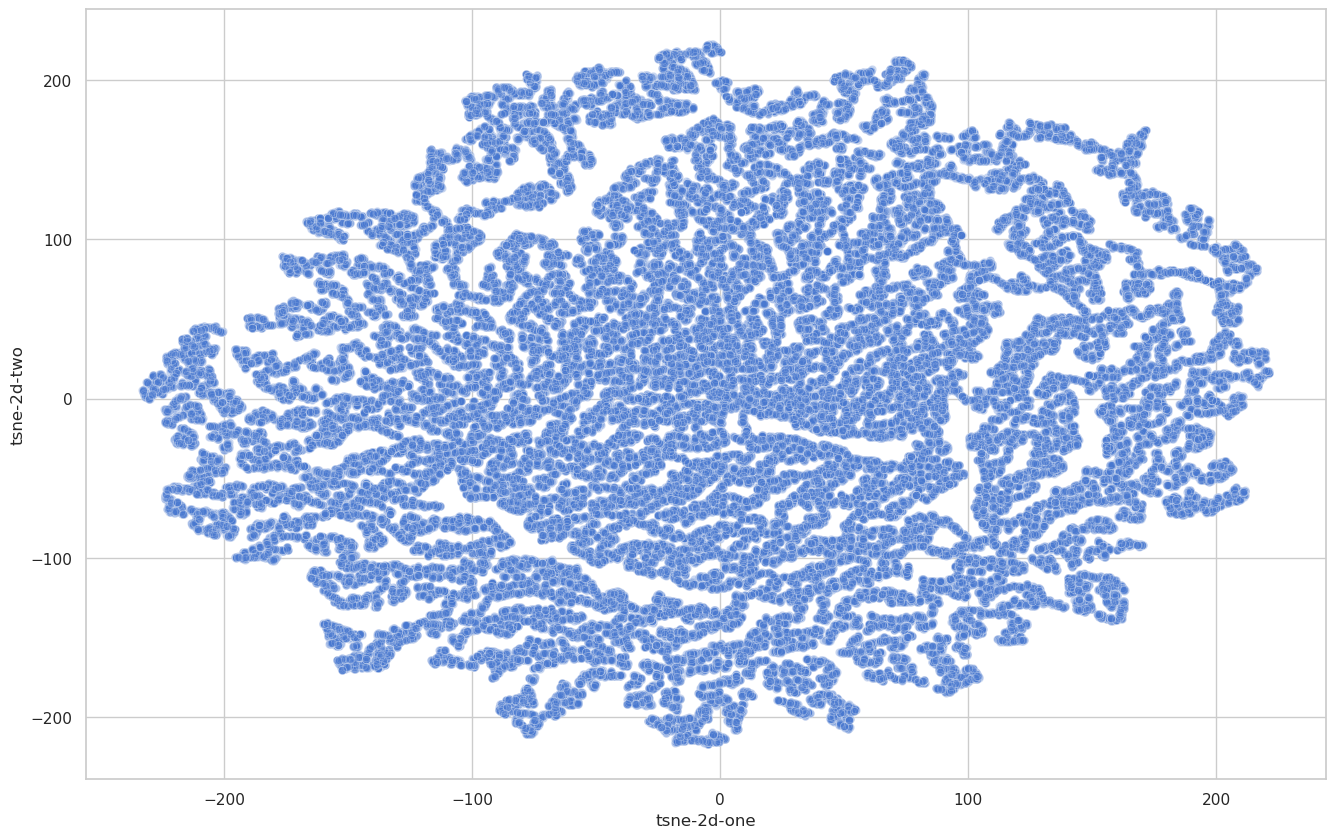

In [441]:
tsne_results_df_10 = pd.DataFrame()
tsne_results_df_10['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df_10['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_df_10,
    legend="full",
    alpha=0.3
)

In [1]:
siginfo_cp = siginfo[siginfo['pert_type'] == 'trt_cp']
siginfo_cp_hiq = siginfo_cp[siginfo_cp['is_hiq'] == 1]
siginfo_cp_hiq_cell_iname = siginfo_cp_hiq['cell_iname'].value_counts().tolist()

grouped = siginfo_cp_hiq.groupby(['cell_iname'])
test_df = grouped.get_group("MCF7")
test_df

NameError: name 'siginfo' is not defined

In [473]:

# top 25 cell lines in high quality data
grouped.size().sort_values(ascending=False).head(25)

# just the index of the top 25 cell lines for high quality datafor 
top_25_groups = siginfo_cp_hiq['cell_iname'].value_counts().head(25).index.tolist()


In [475]:
for i in range(25)
    

25

In [457]:
unique_cell_line_names = siginfo_cp_hiq['cell_iname'].unique()

In [464]:
for i in siginfo_cp_hiq_cell_iname[:25]:
    print(i)

12680
11236
10241
8618
8089
6490
6418
4697
4627
4368
4269
4192
3164
2873
2590
2056
1501
1267
1133
1117
1089
1028
847
842
823


In [477]:
print(len(siginfo_cp_hiq.index))

126048


In [501]:
compound_df_5.columns

Index(['ABY001_A375_XH:BRD-A61304759:0.625:24',
       'ABY001_A375_XH:BRD-A61304759:0.625:3',
       'ABY001_A375_XH:BRD-A61304759:10:24',
       'ABY001_A375_XH:BRD-A61304759:10:3',
       'ABY001_A375_XH:BRD-A61304759:2.5:24',
       'ABY001_A375_XH:BRD-A61304759:2.5:3',
       'ABY001_A375_XH:BRD-A90490067:0.625:24',
       'ABY001_A375_XH:BRD-A90490067:0.625:3',
       'ABY001_A375_XH:BRD-A90490067:10:24',
       'ABY001_A375_XH:BRD-A90490067:10:3',
       ...
       'TSAI002_NPC-8_XH:949:10', 'TSAI002_NPC-8_XH:BRD-A19037878:10',
       'TSAI002_NPC-8_XH:BRD-A19500257:10',
       'TSAI002_NPC-8_XH:BRD-A75409952:10', 'TSAI002_NPC-8_XH:C646:10',
       'TSAI002_NPC-8_XH:CI-994:10', 'TSAI002_NPC-8_XH:COMPE:2',
       'TSAI002_NPC-8_XH:DAC-3:5', 'TSAI002_NPC-8_XH:SAHA:2.5',
       'TSAI002_NPC-8_XH:SRT3657:5'],
      dtype='object', name='cid', length=720216)

In [482]:
new_row = pd.Series([0] * len(compound_df_5.columns), index=compound_df_5.columns)
compound_df_5 = compound_df_5.append(new_row, ignore_index=True)

/tmp/ipykernel_21449/4200384969.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compound_df_5 = compound_df_5.append(new_row, ignore_index=True)


In [502]:
compound_df_5.loc[100, 'ABY001_A375_XH:BRD-A61304759:0.625:24']

0.22009998559951782

In [2]:
for i in range(len(siginfo_cp_hiq.index)):
    for j in top_25_groups:
        if siginfo_cp_hiq.loc[i, "cell_iname"] == j:
            sig_id = siginfo_cp_hiq.loc[i, "sig_id"]
            if sig_id in compound_df_5.columns:
                compound_df_5.loc[12329, sig_id] = j
            

NameError: name 'siginfo_cp_hiq' is not defined

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

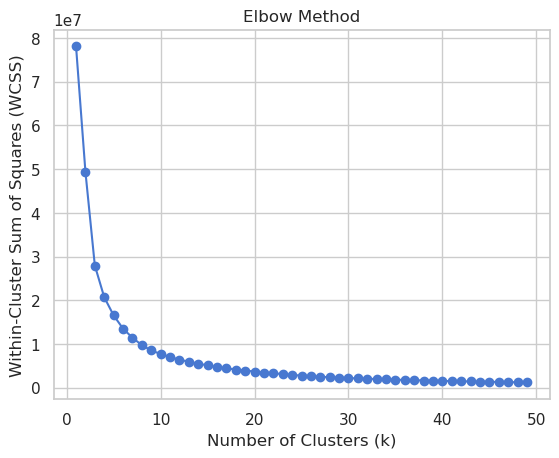

In [414]:

  # elbow curve

k_values = range(1, 50)

# Initialize an empty list to store the WCSS values for each cluster number
wcss_values = []

# Iterate over each cluster number and calculate WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tsne_results_df_10)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()



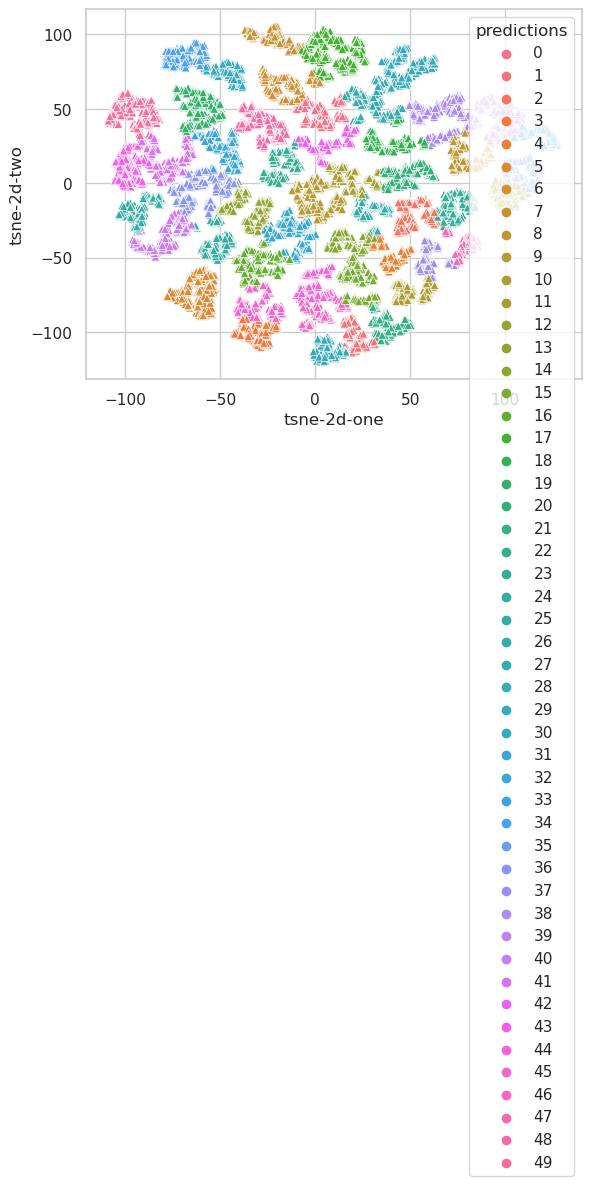

In [423]:
def kMeansClustering(pca_df, x = 'PCA1', y = 'PCA2', num_clusters = 3):
    kmeans=  KMeans(init = "random", n_clusters = num_clusters, n_init = 10, max_iter = 300, random_state = 42)
    kmeans.fit_predict(pca_df.iloc[:,:2])
    temp_df = pca_df
    temp_df['predictions'] = kmeans.labels_

    temp_df['predictions'] = temp_df.predictions.astype('category')
    ax = sns.scatterplot(x = x, y = y, marker = '^', hue = 'predictions', data = temp_df)

kMeansClustering(tsne_results_df_10, x = "tsne-2d-one", y = "tsne-2d-two", num_clusters = 50)

In [417]:
tsne_results_df_10

tsne-2d-one  tsne-2d-two predictions
0       -31.524986   -64.636757          16
1        -9.784859    -1.884879           9
2        19.372129    91.463654          17
3       -40.739956    -0.751548          13
4       108.971458    45.899044          39
...            ...          ...         ...
12323    83.402977   -42.345234          47
12324    90.085579    54.419880          39
12325   -40.536331   -86.596832          45
12326   -47.368877   -37.355083          24
12327   -52.616726    33.416592          32

[12328 rows x 3 columns]

In [7]:
# goal: do labelling and tsne on 2150 samples

cp_data_5_brca

ASG002_22RV1_24H:G01  ASG002_22RV1_24H:G02  ASG002_22RV1_24H:G03  \
0                    6.3341                5.2243                1.4654   
1                    5.7040                3.8875                1.5365   
2                   -2.9910               -1.9209               -1.0358   
3                    3.9700                5.6208                0.5289   
4                   -2.3277               -2.3518                0.2349   
...                     ...                   ...                   ...   
12323                4.2057                3.6518                1.9640   
12324                1.6694               -0.2801               -1.4899   
12325                6.7483                5.7797                1.7852   
12326                3.6206                3.9382                0.8368   
12327                2.1597               -2.6141                0.5818   

       ASG002_A204_24H:G01  ASG002_A204_24H:G02  ASG002_A204_24H:G03  \
0                   6.2629               3.9781               1.2195   
1                   1.6703               1.3070               2.7850   
2                  -2.9038              -5.0097              -2.3691   
3                   3.9876               2.2609              -0.5697   
4                  -3.5842              -1.6755              -1.4238   
...                    ...                  ...                  ...   
12323               3.4635               3.6315               2.9119   
12324               1.8976               2.9089              -1.2112   
12325               3.7609               4.1686               2.2781   
12326               2.9154               2.0799               2.1706   
12327              -1.1932               1.3871               0.6373   

       ASG002_A375_24H:G01  ASG002_A375_24H:G02  ASG002_A375_24H:G03  \
0                   6.1488               4.0922               1.1059   
1                   5.4293               0.7800               1.4167   
2                  -2.9722              -4.9434              -1.7842   
3                   1.9401               0.9537              -0.4397   
4                  -7.8688               0.3276               0.1025   
...                    ...                  ...                  ...   
12323               2.6375               1.7725               4.3800   
12324              -5.8008              -2.5927              -1.6764   
12325               9.5054               3.4288               2.5153   
12326               6.0032               4.7213               1.1074   
12327              -1.6868               0.7457               3.2476   

       ASG002_A549_24H:G01  ...  REP.B026_YAPC_24H:K15  REP.B026_YAPC_24H:K16  \
0                 4.514831  ...                0.81095                0.19735   
1                 3.941693  ...               -0.43355                0.35725   
2                -2.379551  ...               -0.92210                0.73370   
3                 0.792092  ...               -0.39895                0.41420   
4                -5.111275  ...               -1.41400               -0.27745   
...                    ...  ...                    ...                    ...   
12323             4.631664  ...               -0.32870               -1.02080   
12324            -0.796254  ...                0.44215                0.03705   
12325             6.226738  ...                0.96875                0.05385   
12326             6.225053  ...                0.25605               -0.05165   
12327            -0.384285  ...                0.16045               -0.98140   

       REP.B026_YAPC_24H:K17  REP.B026_YAPC_24H:K18  REP.B026_YAPC_24H:L19  \
0                   -1.12305                0.01275               -1.67480   
1                   -0.04215                0.11075               -1.35725   
2                   -0.46610               -0.21345               -1.44465   
3                    0.53530                0.14940                1.87780   
4            

In [13]:
index_genes = pd.read_csv("all_z_Scores_Dox_Module_6.tsv", sep = '\t')
index_genes = index_genes.iloc[:,0]

In [14]:
cp_data_5_brca.index = index_genes

In [15]:
cp_data_5_brca.index

Index(['NAT2', 'ADA', 'CDH2', 'AKT3', 'MED6', 'NAALAD2', 'NAALADL1', 'ACOT8',
       'ABI1', 'GNPDA1',
       ...
       'REC8', 'HNRNPDL', 'DMTF1', 'PPP4R1', 'CDH1', 'SLC12A6', 'PTBP3',
       'KCNE2', 'DGCR2', 'SCO2'],
      dtype='object', name='Unnamed: 0', length=12328)

In [219]:
pd.set_option("display.max_columns", 37)

In [10]:
# target = ['doxorubicin', "epirubicin", 'paclitaxel', 'docitaxel', 'capecitabine']
target = ['doxorubicin',"epirubicin", 'paclitaxel', 'docitaxel', 'capecitabine']

In [11]:
filtered_siginfo = siginfo[siginfo['cmap_name'].isin(target)]

In [12]:
filtered_siginfo['sig_id'].tolist()

['HOG002_A549_6H:BRD-K92093830-003-18-3:1.11',
 'RAD001_PC3_6H:BRD-A23723433-001-01-2:0.3704',
 'HOG002_MCF7_24H:BRD-K92093830-003-18-3:0.1234',
 'RAD001_MCF7_24H:BRD-A23723433-001-01-2:0.1235',
 'HOG002_MCF7_6H:BRD-K92093830-003-18-3:0.3704',
 'LGR001_XC.L100.M_24H:PACLITAXEL10.0_UM',
 'KTOX002_HPTEC_6H:BRD-A23723433:316.2',
 'HOG002_A549_24H:BRD-K92093830-003-18-3:0.0412',
 'CPD001_PC3_24H:BRD-K86858124-001-01-2:10',
 'RAD001_MCF7_24H:BRD-A23723433-001-01-2:10',
 'LUNG001_IMR90_24H:BRD-K04548931:10',
 'LCP001_MCF10A.KRAS.HG_24H:D09',
 'RAD001_HCC515_6H:BRD-A23723433-001-01-2:0.1235',
 'HOG002_A549_6H:BRD-K92093830-003-18-3:3.33',
 'LIVB002_HUH7_72H:D07',
 'LCP001_MCF10A.WT_24H:F07',
 'HOG002_MCF7_24H:BRD-K92093830-003-18-3:0.013',
 'LCP001_MCF10A.WT_6H:F09',
 'RAD001_A549_6H:BRD-A23723433-001-01-2:3.3333',
 'RAD001_HCC515_6H:BRD-A23723433-001-01-2:3.3333',
 'LGR001_XC.L100.M_48H:PACLITAXEL1.111_UM',
 'LUNG001_A549_24H:BRD-K04548931:10',
 'LCP001_MCF10A.WT_24H:D09',
 'LCP001_MCF10A.WT

In [27]:
compound_df_5 = cparse.parse("/data3/balaji/cmap/level5_beta_trt_cp_n720216x12328.gctx")
compound_df_5 = compound_df_5.data_df

In [14]:
compound_df_5 = compound_df_5.data_df

In [15]:
five_drug_BRCA_cp = compound_df_5[filtered_siginfo['sig_id'].tolist()]

In [16]:
filtered_siginfo['cell_mfc_name'].value_counts()

MCF7     157
A549     140
PC3      115
HA1E      86
A375      84
        ... 
NL20       1
HS27A      1
HUH7       1
HFL1       1
1HAE       1
Name: cell_mfc_name, Length: 160, dtype: int64

In [483]:
cell_line_counts = filtered_siginfo['cell_mfc_name'].value_counts()

In [17]:
cell_line_counts = filtered_siginfo['cell_mfc_name'].value_counts()

In [18]:
cell_line_counts_to_remove = cell_line_counts[cell_line_counts < 120].index
cell_line_counts_to_remove

Index(['PC3', 'HA1E', 'A375', 'HT29', 'THP1', 'YAPC', 'MCF10A', 'HELA',
       'JURKAT', 'HCC515',
       ...
       'WI38', 'COV434', 'NCIH2110', 'SKM1', 'U937', 'NL20', 'HS27A', 'HUH7',
       'HFL1', '1HAE'],
      dtype='object', length=158)

KeyError: "None of [Index(['A549', 'PC3', 'MCF7', 'MCF7', 'MCF7', 'XC.L100.M', 'HPTEC', 'A549',\n       'PC3', 'MCF7',\n       ...\n       'MCF7', 'PC3', 'HCC515', 'A375', 'A375', 'A375', 'A549', 'HCC515',\n       'PC3', 'PC3'],\n      dtype='object', length=1813)] are in the [columns]"

In [19]:
qc_cell_lines_siginfo = filtered_siginfo[~filtered_siginfo['cell_mfc_name'].isin(cell_line_counts_to_remove)]

In [20]:
qc_cell_lines_siginfo['cell_mfc_name'].value_counts()

MCF7    157
A549    140
Name: cell_mfc_name, dtype: int64

In [21]:
qc_cell_lines_siginfo_dosage = qc_cell_lines_siginfo[qc_cell_lines_siginfo['pert_dose'] == 10.000000]

In [22]:
qc_cell_lines_siginfo_dosage_time = qc_cell_lines_siginfo_dosage[qc_cell_lines_siginfo_dosage['pert_time'] == 24.0]

In [499]:
qc_cell_lines_siginfo_dosage_time

bead_batch  nearest_dose  pert_dose pert_dose_unit pert_idose  \
3865          f1b5          10.0       10.0             uM      10 uM   
6870           b18          10.0       10.0             uM      10 uM   
39554          b10          10.0       10.0             uM      10 uM   
49448           b6          10.0       10.0             uM      10 uM   
64107        f1b10          10.0       10.0             uM      10 uM   
68254           b6          10.0       10.0             uM      10 uM   
107746         b34          10.0       10.0             uM      10 uM   
111293         b41          10.0       10.0             uM      10 uM   
113463         b40          10.0       10.0             uM      10 uM   
115447         b34          10.0       10.0             uM      10 uM   
159949          b3          10.0       10.0             uM      10 uM   
168850          b5          10.0       10.0             uM      10 uM   
169305          b5          10.0       10.0             uM      10 uM   
170356          b4          10.0       10.0             uM      10 uM   
187506        f1b6          10.0       10.0             uM      10 uM   
189174        f1b6          10.0       10.0             uM      10 uM   
193963          b4          10.0       10.0             uM      10 uM   
203187        f1b6          10.0       10.0             uM      10 uM   
206090          b4          10.0       10.0             uM      10 uM   
213912        f1b6          10.0       10.0             uM      10 uM   
218944        f1b6          10.0       10.0             uM      10 uM   
229640        f1b6          10.0       10.0             uM      10 uM   
242946        f1b6          10.0       10.0             uM      10 uM   
249257          b5          10.0       10.0             uM      10 uM   
257275        f1b6          10.0       10.0             uM      10 uM   
260242          b5          10.0       10.0             uM      10 uM   
263764          b5          10.0       10.0             uM      10 uM   
700346         b23          10.0       10.0             uM      10 uM   
744585         b25          10.0       10.0             uM      10 uM   
771056         b29          10.0       10.0             uM      10 uM   
773152         b29          10.0       10.0             uM      10 uM   
818930         b24          10.0       10.0             uM      10 uM   
836434         b25          10.0       10.0             uM      10 uM   
840423         b32          10.0       10.0             uM      10 uM   
876477         b29          10.0       10.0             uM      10 uM   
1059224        b41          10.0       10.0             uM      10 uM   
1060597        b41          10.0       10.0             uM      10 uM   
1062411        b41          10.0       10.0             uM      10 uM   
1062842        b41          10.0       10.0             uM      10 uM   
1118510        b13          10.0       10.0             uM      10 uM   
1119125        b13          10.0       10.0             uM      10 uM   
1149065        b21          10.0       10.0             uM      10 uM   
1149236        b21          10.0       10.0             uM      10 uM   
1169619        b21          10.0       10.0             uM      10 uM   
1177275        b21          10.0       10.0             uM      10 uM   

        pert_itime  pert_time pert_time_unit cell_mfc_name    pert_mfc_id  \
3865          24 h       24.0              h          MCF7  BRD-A23723433   
6870          24 h       24.0              h          A549  BRD-K04548931   
39554         24 h       24.0              h          MCF7  BRD-K92093830   
49448         24 h       24.0              h          MCF7  BRD-K92093830   
64107         24 h       24.0              h          A549  BRD-K92093830   
68254         24 h       24.0              h          MCF7  BRD-K86858124   
107746        24 h       24.0              h          MCF7  BRD-K04548931   
111293        24 h       24.0    

In [23]:
five_drug_BRCA_cp_filtered = compound_df_5[qc_cell_lines_siginfo_dosage_time['sig_id'].tolist()]

In [24]:
five_drug_BRCA_cp_filtered.columns

Index(['RAD001_MCF7_24H:BRD-A23723433-001-01-2:10',
       'LUNG001_A549_24H:BRD-K04548931:10',
       'HOG002_MCF7_24H:BRD-K92093830-003-18-3:10',
       'CPD002_MCF7_24H:BRD-K92093830-003-21-7:10',
       'HOG002_A549_24H:BRD-K92093830-003-18-3:10',
       'CPD001_MCF7_24H:BRD-K86858124-001-01-2:10', 'ASG002_MCF7_24H:G01',
       'ASG003_MCF7_24H:C04', 'ASG003_A549_24H:C04', 'ASG002_A549_24H:G01',
       'CPC005_A549_24H:BRD-A76941896-003-02-0:10',
       'CPC005_MCF7_24H:BRD-A76941896-003-02-0:10',
       'CPC013_MCF7_24H:BRD-K61192372-001-01-4:10',
       'CPC017_MCF7_24H:BRD-A23723433-001-01-2:10',
       'CPC015_A549_24H:BRD-K92093830-003-05-0:10',
       'CPC015_A549_24H:BRD-A28746609-001-05-7:10',
       'CPC018_MCF7_24H:BRD-A52530684-001-01-1:10',
       'CPC017_A549_24H:BRD-A23723433-001-01-2:10',
       'CPC015_MCF7_24H:BRD-A28746609-001-05-7:10',
       'CPC018_A549_24H:BRD-A52530684-001-01-1:10',
       'CPC011_A549_24H:BRD-K04548931-003-11-6:10',
       'CPC011_A549_24H:B

In [398]:
five_drug_BRCA_cp_filtered_corr = five_drug_BRCA_cp_filtered.corr(method = 'spearman')

In [498]:
qc_cell_lines_siginfo_dosage_time['sig_id'].tolist()

['RAD001_MCF7_24H:BRD-A23723433-001-01-2:10',
 'LUNG001_A549_24H:BRD-K04548931:10',
 'HOG002_MCF7_24H:BRD-K92093830-003-18-3:10',
 'CPD002_MCF7_24H:BRD-K92093830-003-21-7:10',
 'HOG002_A549_24H:BRD-K92093830-003-18-3:10',
 'CPD001_MCF7_24H:BRD-K86858124-001-01-2:10',
 'ASG002_MCF7_24H:G01',
 'ASG003_MCF7_24H:C04',
 'ASG003_A549_24H:C04',
 'ASG002_A549_24H:G01',
 'CPC005_A549_24H:BRD-A76941896-003-02-0:10',
 'CPC005_MCF7_24H:BRD-A76941896-003-02-0:10',
 'CPC013_MCF7_24H:BRD-K61192372-001-01-4:10',
 'CPC017_MCF7_24H:BRD-A23723433-001-01-2:10',
 'CPC015_A549_24H:BRD-K92093830-003-05-0:10',
 'CPC015_A549_24H:BRD-A28746609-001-05-7:10',
 'CPC018_MCF7_24H:BRD-A52530684-001-01-1:10',
 'CPC017_A549_24H:BRD-A23723433-001-01-2:10',
 'CPC015_MCF7_24H:BRD-A28746609-001-05-7:10',
 'CPC018_A549_24H:BRD-A52530684-001-01-1:10',
 'CPC011_A549_24H:BRD-K04548931-003-11-6:10',
 'CPC011_A549_24H:BRD-K92093830-003-23-3:10',
 'CPC015_A549_24H:BRD-K04548931-003-05-8:10',
 'CPC011_MCF7_24H:BRD-K92093830-003-23

In [399]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
# principalComponents = pca.fit_transform(five_drug_BRCA_cp_filtered)
principalComponents = pca.fit_transform(five_drug_BRCA_cp_filtered_corr)

In [400]:
pca.explained_variance_ratio_

array([0.52151055, 0.22112889, 0.09017999, 0.04389197, 0.02521453,
       0.02280581, 0.01924839, 0.01399386, 0.01177904, 0.0069983 ])

In [68]:
pca

PCA(n_components=50)

In [63]:
pca_1 = PCA(n_components = 50)
principalComponents_1 = pca_1.fit_transform(cp_data_5_brca)

In [218]:
pca_1.explained_variance_ratio_

array([0.38556242, 0.06605124, 0.04548494, 0.02370659, 0.01967075,
       0.01609025, 0.01235079, 0.01075724, 0.01060787, 0.00899161,
       0.00839287, 0.00742337, 0.00622911, 0.00596844, 0.00552259,
       0.00495516, 0.00456244, 0.00435859, 0.00431912, 0.00386552,
       0.00371302, 0.00360023, 0.00348829, 0.00338888, 0.00330167,
       0.00328286, 0.00315906, 0.00299419, 0.00290185, 0.00280773,
       0.00275007, 0.0027179 , 0.00264342, 0.00262817, 0.0025698 ,
       0.00250755, 0.00246828, 0.00233968, 0.00231901, 0.00226944,
       0.00223363, 0.00222169, 0.00218089, 0.00214275, 0.00209534,
       0.00208715, 0.00203965, 0.00201402, 0.00195203, 0.00190426])

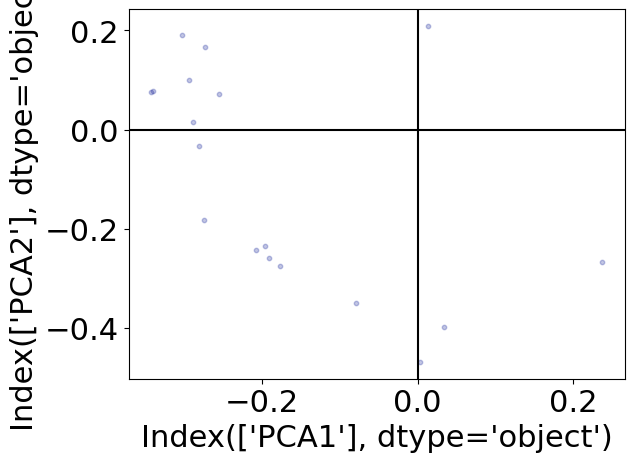

In [401]:
import matplotlib.pyplot as plt
pca_df_transpose = pd.DataFrame()
pca_df_transpose['PCA1'] = pca.components_[0]
pca_df_transpose['PCA2'] = pca.components_[1]
graphScatter(x= pca_df_transpose.iloc[:,0], y = pca_df_transpose.iloc[:,1])

In [238]:
labelling_stuff = five_drug_BRCA_cp_filtered.transpose()
labelling_stuff_v2 = pd.DataFrame()
labelling_stuff_v2.index = five_drug_BRCA_cp_filtered.columns

In [239]:
labelling_stuff_v2['cell_line_label'] = 0

In [240]:
labelling_stuff_v2

cell_line_label
cid                                                        
LUNG001_A549_24H:BRD-K04548931:10                         0
HOG002_MCF7_24H:BRD-K92093830-003-18-3:10                 0
CPD002_MCF7_24H:BRD-K92093830-003-21-7:10                 0
HOG002_A549_24H:BRD-K92093830-003-18-3:10                 0
ASG002_MCF7_24H:G01                                       0
ASG003_MCF7_24H:C04                                       0
ASG003_A549_24H:C04                                       0
ASG002_A549_24H:G01                                       0
CPC005_A549_24H:BRD-A76941896-003-02-0:10                 0
CPC005_MCF7_24H:BRD-A76941896-003-02-0:10                 0
CPC015_A549_24H:BRD-K92093830-003-05-0:10                 0
CPC018_MCF7_24H:BRD-A52530684-001-01-1:10                 0
CPC018_A549_24H:BRD-A52530684-001-01-1:10                 0
CPC011_A549_24H:BRD-K04548931-003-11-6:10                 0
CPC011_A549_24H:BRD-K92093830-003-23-3:10                 0
CPC015_A549_24H:BRD-K04548931-003-05-8:10                 0
CPC011_MCF7_24H:BRD-K92093830-003-23-3:10                 0
CPC011_MCF7_24H:BRD-K04548931-003-11-6:10                 0
CPC015_MCF7_24H:BRD-K04548931-003-05-8:10                 0
REP.A015_MCF7_24H:E07                                     0
REP.A015_A549_24H:E07                                     0
REP.A026_MCF7_24H:L19                                     0
REP.A026_A549_24H:L19                                     0
LKCP002_A549_24H:I22                                      0
LKCP002_MCF7_24H:I22                                      0
PCLB003_MCF7_24H:BRD-A52530684-003-01-7:10                0
PCLB003_A549_24H:BRD-A52530684-003-01-7:10                0
PBIOA018_MCF7_24H:O07                                     0
PBIOA018_A549_24H:O07                                     0

In [241]:
five_drug_BRCA_cp_filtered

cid    LUNG001_A549_24H:BRD-K04548931:10  \
rid                                        
10                               2.04820   
100                             -0.16700   
1000                            -0.61005   
10000                            0.38580   
10001                           -3.56245   
...                                  ...   
9990                             0.65435   
9991                            -1.53920   
9992                             1.99550   
9993                             3.94045   
9997                            -0.76710   

cid    HOG002_MCF7_24H:BRD-K92093830-003-18-3:10  \
rid                                                
10                                      2.016621   
100                                     0.362605   
1000                                    0.035774   
10000                                   1.873137   
10001                                  -3.640007   
...                                          ...   
9990                                    0.753654   
9991                                   -0.727971   
9992                                    2.040430   
9993                                    1.193931   
9997                                   -0.271619   

cid    CPD002_MCF7_24H:BRD-K92093830-003-21-7:10  \
rid                                                
10                                      2.495696   
100                                     2.185647   
1000                                   -0.706048   
10000                                   2.826057   
10001                                  -3.383424   
...                                          ...   
9990                                    1.646858   
9991                                   -0.451510   
9992                                    2.922940   
9993                                    2.375353   
9997                                   -0.923910   

cid    HOG002_A549_24H:BRD-K92093830-003-18-3:10  ASG002_MCF7_24H:G01  \
rid                                                                     
10                                       1.70680             3.356117   
100                                      0.28280             1.985936   
1000                                    -2.06940             1.454730   
10000                                    0.91830             2.733249   
10001                                   -2.55240            -4.437264   
...                                          ...                  ...   
9990                                     2.04345             1.911553   
9991                                    -1.62600            -2.539912   
9992                                     3.80325             2.404290   
9993                                     2.87520             3.094625   
9997                                    -1.03315             0.166305   

cid    ASG003_MCF7_24H:C04  ASG003_A549_24H:C04  ASG002_A549_24H:G01  \
rid                                                                    
10                3.411410             3.152753             4.514831   
100               2.016553             0.410594             3.941693   
1000              0.950688            -2.154081            -2.379550   
10000             3.433066            -2.706923             0.792092   
10001            -2.984976            -6.690877            -5.111275   
...                    ...                  ...                  ...   
9990              0.744378             4.310224             4.631664   
9991             -3.684647            -3.822801            -0.796254   
9992              3.574774             5.564231             6.226738   
9993              1.187030             5.068300             6.225053   
9997              0.174415            -1.205693            -0.384285   

cid    CPC005_A549_24H:BRD-A76941896-003-02-0:10  \
rid                                                
10                                       3.24135   
100                           

In [242]:
for column in five_drug_BRCA_cp_filtered.columns:
    if "MCF7" in column:
        labelling_stuff_v2.loc[column, "cell_line_label"] = 'MCF7'
    elif "A549" in column:
        labelling_stuff_v2.loc[column, "cell_line_label"] = 'AF49'
    else:
        print("weird")


In [243]:
five_drug_BRCA_cp_filtered_transpose = five_drug_BRCA_cp_filtered.transpose()

In [252]:
labelling_stuff_v2_transposed = labelling_stuff_v2.transpose()
labelling_stuff_v2_transposed.columns = five_drug_BRCA_cp_filtered.columns
merged_data = pd.concat([five_drug_BRCA_cp_filtered_transpose, labelling_stuff_v2_transposed], axis=0)


In [253]:
five_drug_BRCA_cp_filtered_transpose['cell_line_label'] = ""

for index in five_drug_BRCA_cp_filtered_transpose.index:
    print(index)
    if "MCF7" in index:
        five_drug_BRCA_cp_filtered_transpose.loc[index, "cell_line_label"] = 'MCF7'
    elif "A549" in index:
        five_drug_BRCA_cp_filtered_transpose.loc[index, "cell_line_label"] = 'AF49'
    else:
        print("weird")

LUNG001_A549_24H:BRD-K04548931:10
HOG002_MCF7_24H:BRD-K92093830-003-18-3:10
CPD002_MCF7_24H:BRD-K92093830-003-21-7:10
HOG002_A549_24H:BRD-K92093830-003-18-3:10
ASG002_MCF7_24H:G01
ASG003_MCF7_24H:C04
ASG003_A549_24H:C04
ASG002_A549_24H:G01
CPC005_A549_24H:BRD-A76941896-003-02-0:10
CPC005_MCF7_24H:BRD-A76941896-003-02-0:10
CPC015_A549_24H:BRD-K92093830-003-05-0:10
CPC018_MCF7_24H:BRD-A52530684-001-01-1:10
CPC018_A549_24H:BRD-A52530684-001-01-1:10
CPC011_A549_24H:BRD-K04548931-003-11-6:10
CPC011_A549_24H:BRD-K92093830-003-23-3:10
CPC015_A549_24H:BRD-K04548931-003-05-8:10
CPC011_MCF7_24H:BRD-K92093830-003-23-3:10
CPC011_MCF7_24H:BRD-K04548931-003-11-6:10
CPC015_MCF7_24H:BRD-K04548931-003-05-8:10
REP.A015_MCF7_24H:E07
REP.A015_A549_24H:E07
REP.A026_MCF7_24H:L19
REP.A026_A549_24H:L19
LKCP002_A549_24H:I22
LKCP002_MCF7_24H:I22
PCLB003_MCF7_24H:BRD-A52530684-003-01-7:10
PCLB003_A549_24H:BRD-A52530684-003-01-7:10
PBIOA018_MCF7_24H:O07
PBIOA018_A549_24H:O07


In [186]:
five_drug_BRCA_cp_filtered_transpose.loc["HOG002_MCF7_24H:BRD-K92093830-003-18-3:10", "cell_line_label"]

''

In [ ]:
cell_line_counts = filtered_siginfo['cell_mfc_name'].value_counts()

In [254]:
labelling_stuff_v2_transposed.shape

(1, 29)

In [250]:
five_drug_BRCA_cp_filtered_transpose.transpose()

cid             LUNG001_A549_24H:BRD-K04548931:10  \
rid                                                 
10                                         2.0482   
100                                        -0.167   
1000                                     -0.61005   
10000                                      0.3858   
10001                                    -3.56245   
...                                           ...   
9991                                      -1.5392   
9992                                       1.9955   
9993                                      3.94045   
9997                                      -0.7671   
cell_line_label                              AF49   

cid             HOG002_MCF7_24H:BRD-K92093830-003-18-3:10  \
rid                                                         
10                                               2.016621   
100                                              0.362605   
1000                                             0.035774   
10000                                            1.873137   
10001                                           -3.640007   
...                                                   ...   
9991                                            -0.727971   
9992                                              2.04043   
9993                                             1.193931   
9997                                            -0.271619   
cell_line_label                                      MCF7   

cid             CPD002_MCF7_24H:BRD-K92093830-003-21-7:10  \
rid                                                         
10                                               2.495696   
100                                              2.185647   
1000                                            -0.706048   
10000                                            2.826057   
10001                                           -3.383424   
...                                                   ...   
9991                                             -0.45151   
9992                                              2.92294   
9993                                             2.375353   
9997                                             -0.92391   
cell_line_label                                      MCF7   

cid             HOG002_A549_24H:BRD-K92093830-003-18-3:10 ASG002_MCF7_24H:G01  \
rid                                                                             
10                                                 1.7068            3.356117   
100                                                0.2828            1.985936   
1000                                              -2.0694             1.45473   
10000                                              0.9183            2.733249   
10001                                             -2.5524           -4.437264   
...                                                   ...                 ...   
9991                                               -1.626           -2.539912   
9992                                              3.80325             2.40429   
9993                                               2.8752            3.094625   
9997                                             -1.03315            0.166305   
cell_line_label                                      AF49                MCF7   

cid             ASG003_MCF7_24H:C04 ASG003_A549_24H:C04 ASG002_A549_24H:G01  \
rid                                                                           
10                          3.41141            3.152753            4.514831   
100                        2.016553            0.410594            3.941693   
1000                       0.950688           -2.154081            -2.37955   
10000                      3.433066           -2.706923            0.792092   
10001                     -2.984976           -6.690877           -5.111275   
...                             ...                 ...                 ...   
9991                      -3.684647 

In [246]:
five_drug_BRCA_cp_filtered_transpose

rid                                               10       100      1000  \
cid                                                                        
LUNG001_A549_24H:BRD-K04548931:10           2.048200 -0.167000 -0.610050   
HOG002_MCF7_24H:BRD-K92093830-003-18-3:10   2.016621  0.362605  0.035774   
CPD002_MCF7_24H:BRD-K92093830-003-21-7:10   2.495696  2.185647 -0.706048   
HOG002_A549_24H:BRD-K92093830-003-18-3:10   1.706800  0.282800 -2.069400   
ASG002_MCF7_24H:G01                         3.356117  1.985936  1.454730   
ASG003_MCF7_24H:C04                         3.411410  2.016553  0.950688   
ASG003_A549_24H:C04                         3.152753  0.410594 -2.154081   
ASG002_A549_24H:G01                         4.514831  3.941693 -2.379550   
CPC005_A549_24H:BRD-A76941896-003-02-0:10   3.241350 -0.497850 -2.324800   
CPC005_MCF7_24H:BRD-A76941896-003-02-0:10   1.907900  1.548550 -1.445400   
CPC015_A549_24H:BRD-K92093830-003-05-0:10  -0.558450  1.362800 -2.163950   
CPC018_MCF7_24H:BRD-A52530684-001-01-1:10   2.843850  3.738400 -0.166000   
CPC018_A549_24H:BRD-A52530684-001-01-1:10   3.493050  0.307800 -2.722100   
CPC011_A549_24H:BRD-K04548931-003-11-6:10   3.407676 -0.213827 -1.433274   
CPC011_A549_24H:BRD-K92093830-003-23-3:10   4.047707 -0.386443 -1.615857   
CPC015_A549_24H:BRD-K04548931-003-05-8:10   0.798654  1.000722 -1.954056   
CPC011_MCF7_24H:BRD-K92093830-003-23-3:10   1.826000  1.615950  1.174100   
CPC011_MCF7_24H:BRD-K04548931-003-11-6:10   1.820200  1.875250 -0.477450   
CPC015_MCF7_24H:BRD-K04548931-003-05-8:10   2.731400  1.877200 -0.635650   
REP.A015_MCF7_24H:E07                       4.283390  1.411534  1.007932   
REP.A015_A549_24H:E07                       2.351088 -0.306019 -2.253637   
REP.A026_MCF7_24H:L19                       2.810050  1.574750  0.493500   
REP.A026_A549_24H:L19                       2.851150 -0.088000 -2.351600   
LKCP002_A549_24H:I22                        3.028558 -0.728456 -0.187070   
LKCP002_MCF7_24H:I22                        2.603021  1.395457  1.630814   
PCLB003_MCF7_24H:BRD-A52530684-003-01-7:10  1.281852  1.434842 -0.777063   
PCLB003_A549_24H:BRD-A52530684-003-01-7:10  2.631071  0.895486 -4.394666   
PBIOA018_MCF7_24H:O07                       3.651550  2.047950  0.382100   
PBIOA018_A549_24H:O07                       1.972800  0.238050 -1.945100   

rid                                            10000     10001     10003  \
cid                                                                        
LUNG001_A549_24H:BRD-K04548931:10           0.385800 -3.562450  2.105000   
HOG002_MCF7_24H:BRD-K92093830-003-18-3:10   1.873137 -3.640007  2.280220   
CPD002_MCF7_24H:BRD-K92093830-003-21-7:10   2.826057 -3.383424  1.246604   
HOG002_A549_24H:BRD-K92093830-003-18-3:10   0.918300 -2.552400  1.864150   
ASG002_MCF7_24H:G01                         2.733249 -4.437264  0.902640   
ASG003_MCF7_24H:C04                         3.433066 -2.984976 -1.214944   
ASG003_A549_24H:C04                        -2.706923 -6.690877  1.615866   
ASG002_A549_24H:G01                         0.792092 -5.111275  2.800002   
CPC005_A549_24H:BRD-A76941896-003-02-0:10   0.611350 -2.740050  3.328400   
CPC005_MCF7_24H:BRD-A76941896-003-02-0:10  -0.661850 -2.227350  1.881500   
CPC015_A549_24H:BRD-K92093830-003-05-0:10  -0.565650 -1.583600  1.053600   
CPC018_MCF7_24H:BRD-A52530684-001-01-1:10   3.695950 -3.584300  2.289300   
CPC018_A549_24H:BRD-A52530684-001-01-1:10   1.268150 -5.072300  2.902750   
CPC011_A549_24H:BRD-K04548931-003-11-6:10   1.342674 -4.055305  2.694994   
CPC011_A549_24H:BRD-K92093830-003-23-3:10   2.326704 -3.490451  3.116930   
CPC015_A549_24H:BRD-K04548931-003-05-8:10   0.807839 -0.675284  1.456215   
CPC011_MCF7_24H:BRD-K92093830-003-23-3:10   0.594000 -0.735150  1.632650   
CPC011_MCF7_24H:BRD-K04548931-003-11-6:10   1.816400 -3.432900  0.656950   
CPC015_MCF7_24H:BRD-K04548931-003-05-8:10   1.001150 -3.053450  0.632600   
REP.A015_MCF7_24H:E07                       3.5

In [257]:
pca_df_transpose.index = five_drug_BRCA_cp_filtered_transpose.transpose().columns

In [311]:
five_drug_BRCA_cp_filtered_transpose

rid                                               10       100      1000  \
cid                                                                        
LUNG001_A549_24H:BRD-K04548931:10           2.048200 -0.167000 -0.610050   
HOG002_MCF7_24H:BRD-K92093830-003-18-3:10   2.016621  0.362605  0.035774   
CPD002_MCF7_24H:BRD-K92093830-003-21-7:10   2.495696  2.185647 -0.706048   
HOG002_A549_24H:BRD-K92093830-003-18-3:10   1.706800  0.282800 -2.069400   
ASG002_MCF7_24H:G01                         3.356117  1.985936  1.454730   
ASG003_MCF7_24H:C04                         3.411410  2.016553  0.950688   
ASG003_A549_24H:C04                         3.152753  0.410594 -2.154081   
ASG002_A549_24H:G01                         4.514831  3.941693 -2.379550   
CPC005_A549_24H:BRD-A76941896-003-02-0:10   3.241350 -0.497850 -2.324800   
CPC005_MCF7_24H:BRD-A76941896-003-02-0:10   1.907900  1.548550 -1.445400   
CPC015_A549_24H:BRD-K92093830-003-05-0:10  -0.558450  1.362800 -2.163950   
CPC018_MCF7_24H:BRD-A52530684-001-01-1:10   2.843850  3.738400 -0.166000   
CPC018_A549_24H:BRD-A52530684-001-01-1:10   3.493050  0.307800 -2.722100   
CPC011_A549_24H:BRD-K04548931-003-11-6:10   3.407676 -0.213827 -1.433274   
CPC011_A549_24H:BRD-K92093830-003-23-3:10   4.047707 -0.386443 -1.615857   
CPC015_A549_24H:BRD-K04548931-003-05-8:10   0.798654  1.000722 -1.954056   
CPC011_MCF7_24H:BRD-K92093830-003-23-3:10   1.826000  1.615950  1.174100   
CPC011_MCF7_24H:BRD-K04548931-003-11-6:10   1.820200  1.875250 -0.477450   
CPC015_MCF7_24H:BRD-K04548931-003-05-8:10   2.731400  1.877200 -0.635650   
REP.A015_MCF7_24H:E07                       4.283390  1.411534  1.007932   
REP.A015_A549_24H:E07                       2.351088 -0.306019 -2.253637   
REP.A026_MCF7_24H:L19                       2.810050  1.574750  0.493500   
REP.A026_A549_24H:L19                       2.851150 -0.088000 -2.351600   
LKCP002_A549_24H:I22                        3.028558 -0.728456 -0.187070   
LKCP002_MCF7_24H:I22                        2.603021  1.395457  1.630814   
PCLB003_MCF7_24H:BRD-A52530684-003-01-7:10  1.281852  1.434842 -0.777063   
PCLB003_A549_24H:BRD-A52530684-003-01-7:10  2.631071  0.895486 -4.394666   
PBIOA018_MCF7_24H:O07                       3.651550  2.047950  0.382100   
PBIOA018_A549_24H:O07                       1.972800  0.238050 -1.945100   

rid                                            10000     10001     10003  \
cid                                                                        
LUNG001_A549_24H:BRD-K04548931:10           0.385800 -3.562450  2.105000   
HOG002_MCF7_24H:BRD-K92093830-003-18-3:10   1.873137 -3.640007  2.280220   
CPD002_MCF7_24H:BRD-K92093830-003-21-7:10   2.826057 -3.383424  1.246604   
HOG002_A549_24H:BRD-K92093830-003-18-3:10   0.918300 -2.552400  1.864150   
ASG002_MCF7_24H:G01                         2.733249 -4.437264  0.902640   
ASG003_MCF7_24H:C04                         3.433066 -2.984976 -1.214944   
ASG003_A549_24H:C04                        -2.706923 -6.690877  1.615866   
ASG002_A549_24H:G01                         0.792092 -5.111275  2.800002   
CPC005_A549_24H:BRD-A76941896-003-02-0:10   0.611350 -2.740050  3.328400   
CPC005_MCF7_24H:BRD-A76941896-003-02-0:10  -0.661850 -2.227350  1.881500   
CPC015_A549_24H:BRD-K92093830-003-05-0:10  -0.565650 -1.583600  1.053600   
CPC018_MCF7_24H:BRD-A52530684-001-01-1:10   3.695950 -3.584300  2.289300   
CPC018_A549_24H:BRD-A52530684-001-01-1:10   1.268150 -5.072300  2.902750   
CPC011_A549_24H:BRD-K04548931-003-11-6:10   1.342674 -4.055305  2.694994   
CPC011_A549_24H:BRD-K92093830-003-23-3:10   2.326704 -3.490451  3.116930   
CPC015_A549_24H:BRD-K04548931-003-05-8:10   0.807839 -0.675284  1.456215   
CPC011_MCF7_24H:BRD-K92093830-003-23-3:10   0.594000 -0.735150  1.632650   
CPC011_MCF7_24H:BRD-K04548931-003-11-6:10   1.816400 -3.432900  0.656950   
CPC015_MCF7_24H:BRD-K04548931-003-05-8:10   1.001150 -3.053450  0.632600   
REP.A015_MCF7_24H:E07                       3.5

In [402]:
qc_cell_lines_siginfo_dosage_time.index = pca_df_transpose.index 

In [403]:
pca_df_transpose['cell_line_label'] =  qc_cell_lines_siginfo_dosage_time['cell_iname']

In [404]:
pca_df_transpose

PCA1      PCA2 cell_line_label
0  -0.293766  0.099928            MCF7
1  -0.339255  0.078743            MCF7
2  -0.273838 -0.183501            A549
3   0.034019 -0.398565            A549
4  -0.255230  0.070827            MCF7
5   0.236564 -0.266635            A549
6  -0.342241  0.075788            MCF7
7  -0.176961 -0.275163            A549
8  -0.078895 -0.350757            A549
9   0.012828  0.209077            MCF7
10 -0.302301  0.190012            MCF7
11 -0.191410 -0.259357            A549
12  0.003531 -0.468931            A549
13 -0.281270 -0.033990            MCF7
14 -0.273128  0.166296            MCF7
15 -0.196505 -0.235734            A549
16 -0.288043  0.014315            MCF7
17 -0.207834 -0.243148            A549

In [ ]:
# now adding drug difference

In [313]:
qc_cell_lines_siginfo_dosage_time.index = pca_df_transpose.index

In [405]:
qc_cell_lines_siginfo_dosage_time['cmap_name'].tolist()

['doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin',
 'doxorubicin']

In [406]:
pca_df_transpose['drug_name'] = qc_cell_lines_siginfo_dosage_time['cmap_name']

In [407]:
pca_df_transpose

PCA1      PCA2 cell_line_label    drug_name
0  -0.293766  0.099928            MCF7  doxorubicin
1  -0.339255  0.078743            MCF7  doxorubicin
2  -0.273838 -0.183501            A549  doxorubicin
3   0.034019 -0.398565            A549  doxorubicin
4  -0.255230  0.070827            MCF7  doxorubicin
5   0.236564 -0.266635            A549  doxorubicin
6  -0.342241  0.075788            MCF7  doxorubicin
7  -0.176961 -0.275163            A549  doxorubicin
8  -0.078895 -0.350757            A549  doxorubicin
9   0.012828  0.209077            MCF7  doxorubicin
10 -0.302301  0.190012            MCF7  doxorubicin
11 -0.191410 -0.259357            A549  doxorubicin
12  0.003531 -0.468931            A549  doxorubicin
13 -0.281270 -0.033990            MCF7  doxorubicin
14 -0.273128  0.166296            MCF7  doxorubicin
15 -0.196505 -0.235734            A549  doxorubicin
16 -0.288043  0.014315            MCF7  doxorubicin
17 -0.207834 -0.243148            A549  doxorubicin

In [36]:
cell_type_colors = {"A549": "red", "MCF7": "blue"}
drug_markers = {"doxorubicin": "o", "epirubicin": "s", 'capecitabine' : 'd' , 'epirubicin' : 'x' , 'paclitaxel' : '^'}

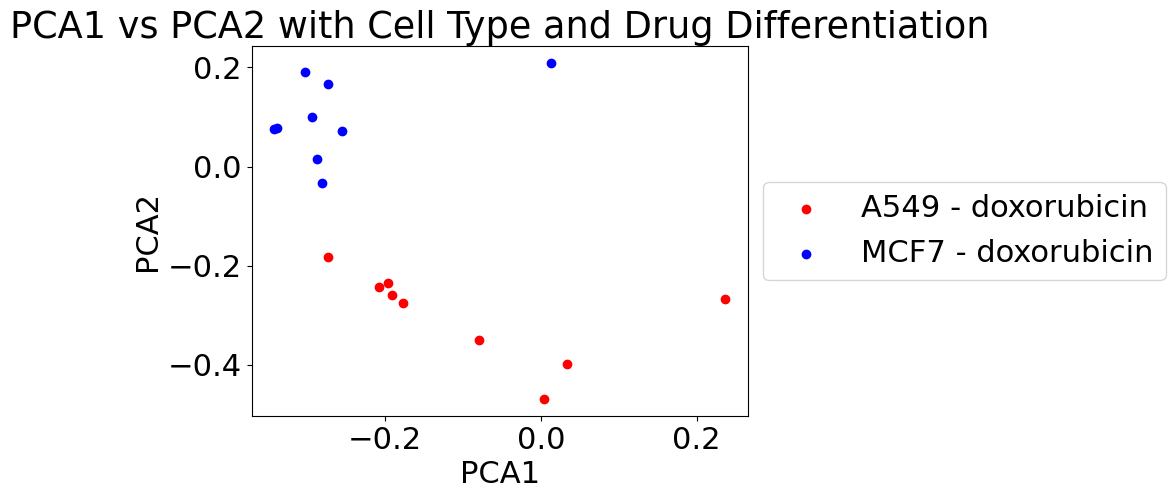

In [409]:
fig, ax = plt.subplots()

for (cell_type, drug), group_df in pca_df_transpose.groupby(["cell_line_label", "drug_name"]):
    color = cell_type_colors[cell_type]
    marker = drug_markers[drug]
    ax.scatter(group_df["PCA1"], group_df["PCA2"], c=color, marker=marker, label=f"{cell_type} - {drug}")

# Add legend
ax.legend()

# Add labels and title
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_title("PCA1 vs PCA2 with Cell Type and Drug Differentiation")

#
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
55

# Show the plot
plt.show()

<Axes: xlabel='PCA1', ylabel='PCA2'>

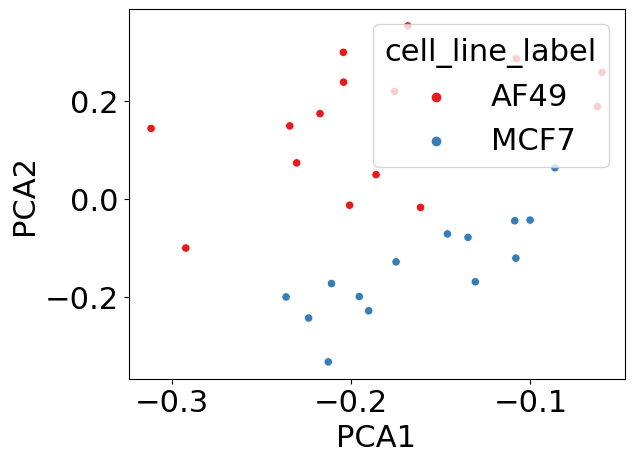

In [263]:
sns.scatterplot(x='PCA1', y='PCA2', hue='cell_line_label', data=pca_df_transpose, palette='Set1')


In [212]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 15, n_iter = 2000)
tsne_results = tsne.fit_transform(pca_df_transpose.iloc[:,:2])

[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Indexed 18 samples in 0.000s...
[t-SNE] Computed neighbors for 18 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.386983
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.960663
[t-SNE] KL divergence after 1500 iterations: 0.190378


In [213]:
tsne_results

array([[  6.13871   ,  32.144325  ],
       [ -1.2791332 ,  39.459534  ],
       [  2.5194204 ,  23.01321   ],
       [ 10.329332  ,  -5.970213  ],
       [ -6.457205  ,  20.461899  ],
       [  7.562672  ,   4.502876  ],
       [-20.918198  ,  33.20771   ],
       [ 12.987393  ,  12.246846  ],
       [  0.14771143,  -2.619093  ],
       [-10.372981  ,  12.366431  ],
       [-18.30115   ,  20.77126   ],
       [  3.260968  ,  14.67851   ],
       [ 17.761185  ,   1.5188832 ],
       [-11.142524  ,  38.03065   ],
       [ -3.7216165 ,  29.87136   ],
       [ -1.6689252 ,   7.622844  ],
       [-12.485555  ,  28.2464    ],
       [ 11.742948  ,  21.177595  ]], dtype=float32)

/tmp/ipykernel_20759/4123868877.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

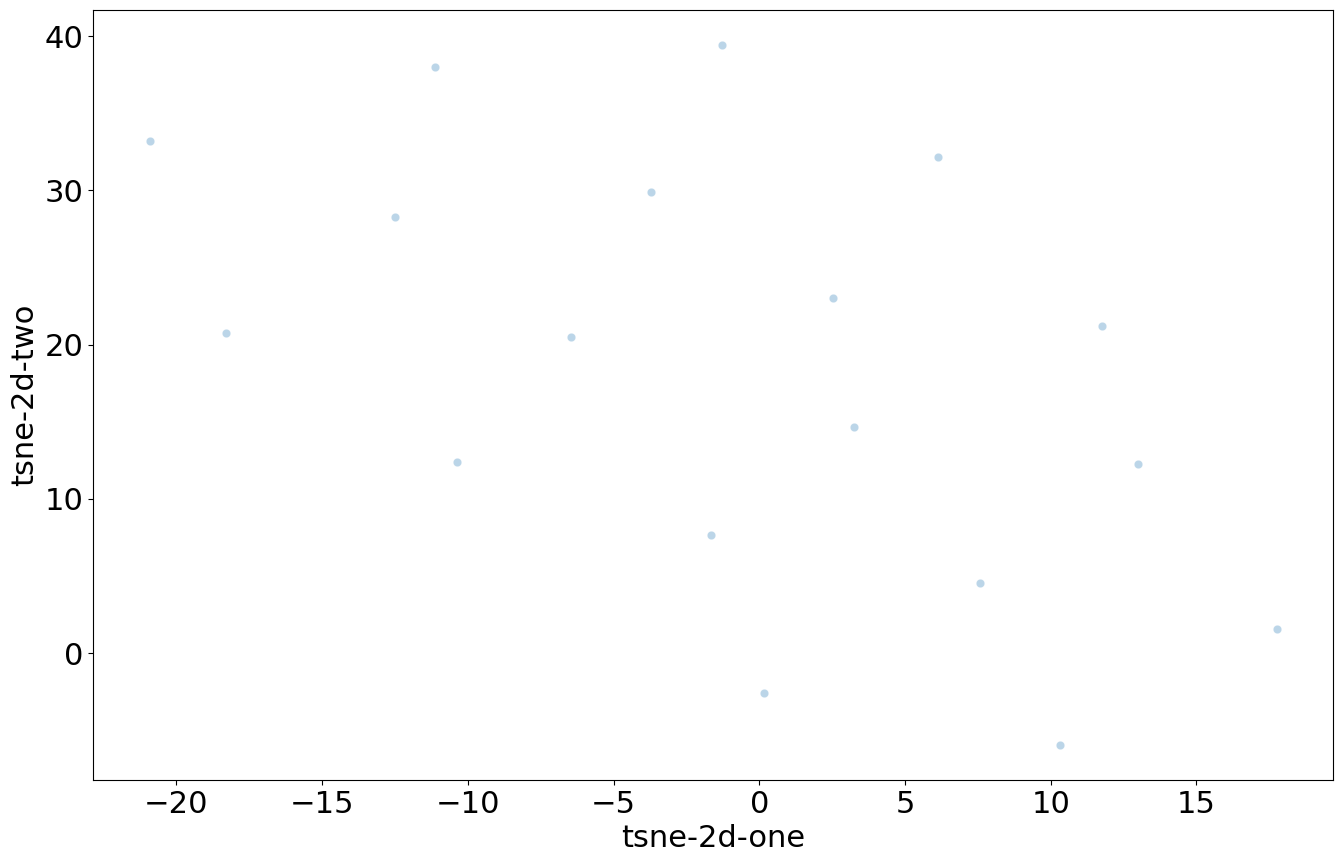

In [214]:
tsne_results_df_10 = pd.DataFrame()
tsne_results_df_10['tsne-2d-one'] = tsne_results[:,0]
tsne_results_df_10['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    # hue="tsne-2d-one",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_df_10,
    legend="full",
    alpha=0.3
)

In [334]:
five_drug_BRCA_cp_filtered_transpose.corr(method = 'pearson')

/tmp/ipykernel_20759/2461869922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  five_drug_BRCA_cp_filtered_transpose.corr(method = 'pearson')


rid          10       100      1000     10000     10001     10003     10004  \
rid                                                                           
10     1.000000  0.086293  0.139640  0.323036 -0.625367  0.218241  0.488122   
100    0.086293  1.000000  0.334725  0.335237  0.041753 -0.193524  0.378891   
1000   0.139640  0.334725  1.000000  0.605078  0.082318 -0.494655  0.133156   
10000  0.323036  0.335237  0.605078  1.000000  0.082747 -0.146100  0.211335   
10001 -0.625367  0.041753  0.082318  0.082747  1.000000 -0.104434 -0.363747   
...         ...       ...       ...       ...       ...       ...       ...   
9990   0.288075  0.250923 -0.362595 -0.251980 -0.328938  0.395446  0.513270   
9991  -0.247412  0.173596 -0.235390 -0.098746  0.426956  0.520624 -0.128115   
9992   0.600145  0.296582 -0.094686  0.049389 -0.736314  0.076976  0.681902   
9993   0.479260  0.009784 -0.335145 -0.185885 -0.651395  0.351927  0.169326   
9997  -0.177061  0.146993  0.307798  0.067417 -0.046972 -0.333652 -0.165743   

rid       10005     10006     10007     10009  100093698      1001     10010  \
rid                                                                            
10     0.228407 -0.305281 -0.031150  0.637453   0.612287  0.280432  0.504205   
100   -0.147415  0.272423  0.338296  0.126936   0.172129  0.303667  0.516634   
1000   0.036066 -0.080824  0.474276 -0.226006  -0.300486  0.364910  0.049455   
10000 -0.112676 -0.244538  0.262015  0.138074  -0.004083  0.061202  0.151395   
10001 -0.506832  0.307034  0.031108 -0.544476  -0.678222 -0.255332 -0.382949   
...         ...       ...       ...       ...        ...       ...       ...   
9990   0.088529  0.117946 -0.072886  0.569243   0.707904  0.328459  0.504791   
9991  -0.609768  0.396167 -0.264046  0.046229  -0.163727 -0.311713  0.181011   
9992   0.471043 -0.265456  0.046251  0.598227   0.867771  0.336246  0.584855   
9993   0.166601 -0.003077 -0.068252  0.523491   0.585826  0.237716  0.199369   
9997  -0.086160  0.118578  0.286100 -0.377800  -0.240438  0.418520 -0.220253   

rid    100126791  100128640  100129250  100129271  ...      9973      9975  \
rid                                                ...                       
10      0.294400   0.583145   0.510542   0.760469  ...  0.363644 -0.232809   
100    -0.112285   0.181439  -0.107020   0.204949  ...  0.246276  0.353253   
1000   -0.419139   0.084133   0.154301   0.139674  ...  0.005432  0.347908   
10000  -0.372370   0.304527   0.055241   0.218071  ... -0.165917  0.188691   
10001  -0.540029  -0.595490  -0.620013  -0.581183  ... -0.556595  0.403893   
...          ...        ...        ...        ...  ...       ...       ...   
9990    0.349497   0.383101   0.150941   0.432717  ...  0.506212 -0.040007   
9991   -0.163395  -0.393878  -0.720361  -0.320799  ... -0.070376  0.618432   
9992    0.484699   0.749229   0.520594   0.663482  ...  0.575953 -0.282749   
9993    0.366232   0.337861   0.252559   0.426194  ...  0.683147 -0.413950   
9997   -0.206657  -0.054685  -0.022110  -0.062205  ...  0.299746  0.067245   

rid        9976      9978       998      9980      9982      9984      9985  \
rid                                                                           
10     0.636579  0.387832 -0.327094  0.247541 -0.023236 -0.191206  0.472436   
100   -0.006224  0.233209 -0.125924 -0.229133  0.459154  0.474628  0.117825   
1000  -0.159022  0.145570  0.217652 -0.648082 -0.052595  0.373320 -0.220476   
10000  0.170781  0.086708  0.072494 -0.305693  0.231243  0.201818 -0.175316   
10001 -0.554232 -0.556332  0.264164 -0.232599  0.074569  0.112327 -0.546471   
...         ...       ...       ...       ...       ...       ...       ...   
9990   0.132132  0.288194 -0.312635  0.459003  0.169049  0.275112  0.750112   
9991  -0.207497 -0.582395 -0.160315  0.122565  0.355608 -0.056980 -0.051770   
9992   0.560553  0.659503 -0.257505  0.456789  0.167152  0.131360  0.644506   
9993   0.220718  0.354781 -0.422297  0.376126  

In [341]:
corr_five_drug_BRCA_cp_filtered = five_drug_BRCA_cp_filtered.corr()

In [344]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(corr_five_drug_BRCA_cp_filtered)

In [345]:
pca.explained_variance_ratio_

array([0.80553112, 0.05943078, 0.04997451, 0.02031855, 0.01025217,
       0.00753875, 0.00665963, 0.00557324, 0.00497591, 0.00454209])

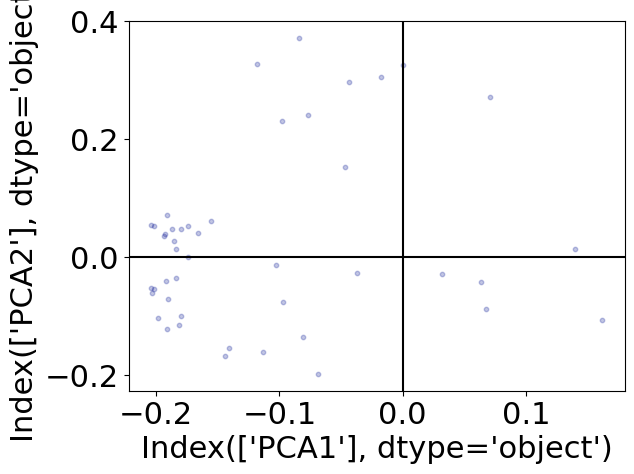

In [346]:
pca_df_transpose = pd.DataFrame()
pca_df_transpose['PCA1'] = pca.components_[0]
pca_df_transpose['PCA2'] = pca.components_[1]pca_df_transpose = pd.DataFrame()
pca_df_transpose['PCA1'] = pca.components_[0]
pca_df_transpose['PCA2'] = pca.components_[1]
graphScatter(x= pca_df_transpose.iloc[:,0], y = pca_df_transpose.iloc[:,1])
graphScatter(x= pca_df_transpose.iloc[:,0], y = pca_df_transpose.iloc[:,1])

In [348]:
pca_df_transpose['drug_name'] = qc_cell_lines_siginfo_dosage_time['cmap_name']

In [350]:
pca_df_transpose['cell_line_label'] = qc_cell_lines_siginfo_dosage_time['cell_iname']

True    45
dtype: int64

In [ ]:
# SANITY CHECK WITH CORRELATION MATRICES
# already done

# UMAP TIME

In [6]:
import umap

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/pyth

In [7]:
reducer = umap.UMAP(n_neighbors = 10, min_dist = 0.1, metric = 'correlation')

In [8]:
five_drug_BRCA_cp_filtered

NameError: name 'five_drug_BRCA_cp_filtered' is not defined

In [630]:
# idea: sort, assign column 1-12328 in new

df = five_drug_BRCA_cp_filtered

# row_length = len(df.index)
# col_length = len(df.columns)
# tempMatrix = np.zeros([row_length,col_length])
# tempDF = pd.DataFrame(tempMatrix)
# df = df.reset_index()
# df = pd.concat([df, tempDF], axis = 1)
# df.set_index(df.iloc[:,0], inplace = True)
# df.drop(df.columns[[0]],axis = 1, inplace = True)

# # names the columns
# newColNames = []
# lenColNames = int(len(df.columns) / 2)
# colNames = df.columns[0:lenColNames]
# for i in colNames:
#     newColNames.append(i)
# for i in colNames:
#     tempName = i + " rank"
#     newColNames.append(tempName)
# df.columns = newColNames

for idx, columnName in enumerate(list(df)):
    df = df.sort_values(by = [columnName])
    seq = list(range(len(df.index)))
    df[columnName + " rank"] = seq

In [634]:
df.iloc[:,45:]

cid    RAD001_MCF7_24H:BRD-A23723433-001-01-2:10 rank  \
rid                                                     
7153                                             9701   
11065                                            7212   
10972                                            1331   
7319                                             6448   
983                                              4177   
...                                               ...   
23210                                            9563   
4775                                             2769   
56997                                           11354   
2770                                             4588   
8349                                              948   

cid    LUNG001_A549_24H:BRD-K04548931:10 rank  \
rid                                             
7153                                      115   
11065                                    1133   
10972                                   11225   
7319                                     8187   
983                                      2995   
...                                       ...   
23210                                       5   
4775                                     4013   
56997                                    1446   
2770                                      896   
8349                                    12245   

cid    HOG002_MCF7_24H:BRD-K92093830-003-18-3:10 rank  \
rid                                                     
7153                                               47   
11065                                              24   
10972                                            2531   
7319                                             3327   
983                                               622   
...                                               ...   
23210                                              26   
4775                                             7644   
56997                                            1656   
2770                                            11311   
8349                                             8949   

cid    CPD002_MCF7_24H:BRD-K92093830-003-21-7:10 rank  \
rid                                                     
7153                                               94   
11065                                             461   
10972                                            3203   
7319                                             3830   
983                                               589   
...                                               ...   
23210                                               7   
4775                                            11198   
56997                                            2177   
2770                                            11050   
8349                                            11337   

cid    HOG002_A549_24H:BRD-K92093830-003-18-3:10 rank  \
rid                                                     
7153                                               84   
11065                                            1218   
10972                                            7706   
7319                                             6834   
983                                              2266   
...                                               ...   
23210                                              13   
4775                                             8757   
56997                                            3201   
2770                                             4910   
8349                                            11954   

cid    CPD001_MCF7_24H:BRD-K86858124-001-01-2:10 rank  \
rid                                                     
7153                                              507   
11065                                              36   
10972                                               3   
7319                                               25   
983                                                2

In [25]:
five_drug_BRCA_cp_filtered

cid    RAD001_MCF7_24H:BRD-A23723433-001-01-2:10  \
rid                                                
10                                       -1.4047   
100                                      -0.9818   
1000                                      1.2401   
10000                                     0.0069   
10001                                    -0.2862   
...                                          ...   
9990                                     -0.1790   
9991                                      0.5152   
9992                                     -0.7152   
9993                                     -0.0061   
9997                                      2.1354   

cid    LUNG001_A549_24H:BRD-K04548931:10  \
rid                                        
10                               2.04820   
100                             -0.16700   
1000                            -0.61005   
10000                            0.38580   
10001                           -3.56245   
...                                  ...   
9990                             0.65435   
9991                            -1.53920   
9992                             1.99550   
9993                             3.94045   
9997                            -0.76710   

cid    HOG002_MCF7_24H:BRD-K92093830-003-18-3:10  \
rid                                                
10                                      2.016621   
100                                     0.362605   
1000                                    0.035774   
10000                                   1.873137   
10001                                  -3.640007   
...                                          ...   
9990                                    0.753654   
9991                                   -0.727971   
9992                                    2.040430   
9993                                    1.193931   
9997                                   -0.271619   

cid    CPD002_MCF7_24H:BRD-K92093830-003-21-7:10  \
rid                                                
10                                      2.495696   
100                                     2.185647   
1000                                   -0.706048   
10000                                   2.826057   
10001                                  -3.383424   
...                                          ...   
9990                                    1.646858   
9991                                   -0.451510   
9992                                    2.922940   
9993                                    2.375353   
9997                                   -0.923910   

cid    HOG002_A549_24H:BRD-K92093830-003-18-3:10  \
rid                                                
10                                       1.70680   
100                                      0.28280   
1000                                    -2.06940   
10000                                    0.91830   
10001                                   -2.55240   
...                                          ...   
9990                                     2.04345   
9991                                    -1.62600   
9992                                     3.80325   
9993                                     2.87520   
9997                                    -1.03315   

cid    CPD001_MCF7_24H:BRD-K86858124-001-01-2:10  ASG002_MCF7_24H:G01  \
rid                                                                     
10                                      2.045703             3.356117   
100                                     0.886582             1.985936   
1000                                   -0.973195             1.454730   
10000                                   0.490111             2.733249   
10001                                  -0.373426            -4.437264   
...                                          ...                  ...   
9990                                   -0.131100             1.911553   
9991                                   -1.208410            -2

In [636]:
# this is for the rank I did
embedding = reducer.fit_transform(df.iloc[:,45:].transpose())
embedding.shape


(45, 2)

In [27]:
embedding = reducer.fit_transform(five_drug_BRCA_cp_filtered.transpose())
embedding.shape

(45, 2)

In [28]:

UMAP_df = pd.DataFrame()
UMAP_df['UMAP1'] = embedding[:,0]
UMAP_df['UMAP2'] = embedding[:,1]
graphScatter(x= embedding[:,0], y = embedding[:,1])

NameError: name 'graphScatter' is not defined

In [616]:
len(embedding)

45

In [29]:
qc_cell_lines_siginfo_dosage_time.index = UMAP_df.index

In [30]:
UMAP_df['drug_name'] = qc_cell_lines_siginfo_dosage_time['cmap_name']
UMAP_df['cell_line_name'] = qc_cell_lines_siginfo_dosage_time['cell_iname']

In [32]:
UMAP_df

UMAP1     UMAP2     drug_name cell_line_name
0  -1.202805 -0.809845    paclitaxel           MCF7
1   3.898769  0.265672    epirubicin           A549
2   1.368426  1.656820   doxorubicin           MCF7
3   1.676263  1.631934   doxorubicin           MCF7
4   4.066642  0.061326   doxorubicin           A549
5  -0.111212  0.408465    paclitaxel           MCF7
6   2.389750  0.887711    epirubicin           MCF7
7   3.005157  0.846784    epirubicin           MCF7
8   3.470168  0.418925    epirubicin           A549
9   3.807476 -0.787726    epirubicin           A549
10  4.741802 -1.020992   doxorubicin           A549
11  1.772097  2.194949   doxorubicin           MCF7
12 -1.191691 -1.204687  capecitabine           MCF7
13  0.177073  0.027787    paclitaxel           MCF7
14  5.061874 -1.205935   doxorubicin           A549
15  0.189669 -0.598344    paclitaxel           A549
16  2.044865  1.825763   doxorubicin           MCF7
17 -0.384397 -0.669470    paclitaxel           A549
18 -0.364078 -0.035392    paclitaxel           MCF7
19  4.657641 -0.122597   doxorubicin           A549
20  4.541405 -0.602773    epirubicin           A549
21  4.781425 -0.662282   doxorubicin           A549
22  5.430655 -0.997336    epirubicin           A549
23  1.083282  1.244467   doxorubicin           MCF7
24 -1.452484 -1.042873  capecitabine           A549
25  1.065788  1.802412    epirubicin           MCF7
26  1.440851  2.025955    epirubicin           MCF7
27  2.505714  1.362251    epirubicin           MCF7
28 -0.991763 -1.366801  capecitabine           MCF7
29  4.205840 -1.122213  capecitabine           A549
30  5.311659 -0.688331    epirubicin           A549
31 -0.746006 -0.114536    paclitaxel           MCF7
32  2.357894  1.441484   doxorubicin           MCF7
33 -0.074131 -0.463543    paclitaxel           A549
34  3.695383 -0.388937   doxorubicin           A549
35  1.242888  0.559052  capecitabine           A549
36  5.168415 -0.361339   doxorubicin           A549
37  1.809336  0.440494  capecitabine           MCF7
38  2.826235  0.800711   doxorubicin           MCF7
39  2.540766  1.758377   doxorubicin           MCF7
40  4.364991 -0.246435   doxorubicin           A549
41  0.591329 -0.354978    paclitaxel           A549
42  2.018566  0.894477   doxorubicin           MCF7
43  4.135200 -0.638535   doxorubicin           A549
44 -0.692187 -0.264652    paclitaxel           MCF7

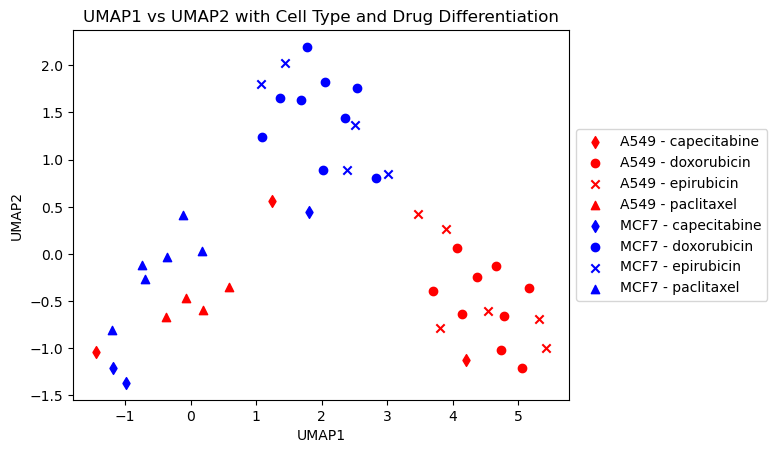

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for (cell_type, drug), group_df in UMAP_df.groupby(["cell_line_name", "drug_name"]):
    color = cell_type_colors[cell_type]
    marker = drug_markers[drug]
    ax.scatter(group_df["UMAP1"], group_df["UMAP2"], c=color, marker=marker, label=f"{cell_type} - {drug}")

# Add legend
ax.legend()

# Add labels and title
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_title("UMAP1 vs UMAP2 with Cell Type and Drug Differentiation")

#
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show the plot
plt.show()

In [ ]:
# sanity check to make sure they match
five_drug_BRCA_cp_filtered.columns = qc_cell_lines_siginfo_dosage_time['sig_id']

In [45]:
qc_siginfo = siginfo[siginfo["is_hiq"] == 1]

In [100]:
# now 10 random perturbations on two more cell lines

cell_mfc_names = [ 'A375']
siginfo_pert_hiq_five_cell_lines = qc_siginfo[qc_siginfo['cell_mfc_name'].isin(cell_mfc_names)]
pert_names = ['doxorubicin', 'capecitabine', 'epirubicin', 'paclitaxel', 'bortezomib', 'aspirin', 'MG-132', 'vorinostat','saracatinib', 'mitoxantrone' ]

In [101]:
siginfo_pert_hiq_five_cell_lines_pert = siginfo_pert_hiq_five_cell_lines[siginfo_pert_hiq_five_cell_lines['cmap_name'].isin(pert_names)]

In [102]:
siginfo_pert_hiq_five_cell_lines_pert['pert_type'].value_counts()

trt_cp    359
Name: pert_type, dtype: int64

In [103]:
siginfo_pert_hiq_five_cell_lines_pert_IDS = siginfo_pert_hiq_five_cell_lines_pert['sig_id'].tolist()

In [104]:
siginfo_pert_hiq_five_cell_lines_pert_IDS

['LPROT003_A375_6H:BRD-K81418486:1',
 'BRAF001_A375_6H:BRD-K81418486-001-15-2:10',
 'BRAF001_A375_6H:BRD-K81418486-001-15-2:0.15625',
 'ABY001_A375_XH:BRD-K81418486:10:24',
 'PCL001_A375_24H:BRD-K81418486:10',
 'ABY001_A375_XH:BRD-K81418486:10:3',
 'DOSBIO002_A375_24H:BRD-K81418486:1.11111',
 'ABY001_A375_XH:BRD-K81418486:0.625:3',
 'ABY001_A375_XH:BRD-K21680192:10:24',
 'BRAF001_A375_24H:BRD-K81418486-001-15-2:2.5',
 'ABY001_A375_XH:BRD-K21680192:10:3',
 'BRAF001_A375_24H:BRD-K81418486-001-15-2:10',
 'ABY001_A375_XH:BRD-K81418486:0.625:24',
 'LPROT002_A375_6H:BRD-K81418486:1',
 'ABY001_A375_XH:BRD-K21680192:2.5:3',
 'DOSBIO001_A375_24H:BRD-K81418486:1.11111',
 'DOSBIO001_A375_24H:BRD-K81418486:3.33333',
 'BRAF001_A375_24H:BRD-K81418486-001-15-2:0.625',
 'ABY001_A375_XH:BRD-K81418486:2.5:24',
 'DOSBIO002_A375_24H:BRD-K81418486:3.33333',
 'ABY001_A375_XH:BRD-K21680192:0.625:3',
 'BRAF001_A375_6H:BRD-K81418486-001-15-2:0.625',
 'ABY001_A375_XH:BRD-K21680192:0.625:24',
 'ABY001_A375_XH:BR

In [105]:
cp_siginfo_pert_hiq_five_cell_lines_pert = compound_df_5[siginfo_pert_hiq_five_cell_lines_pert_IDS]

In [130]:
siginfo[siginfo['cmap_name'] == 'niacinamide']

Empty DataFrame
Columns: [bead_batch, nearest_dose, pert_dose, pert_dose_unit, pert_idose, pert_itime, pert_time, pert_time_unit, cell_mfc_name, pert_mfc_id, nsample, cc_q75, ss_ngene, tas, pct_self_rank_q25, wt, median_recall_rank_spearman, median_recall_rank_wtcs_50, median_recall_score_spearman, median_recall_score_wtcs_50, batch_effect_tstat, batch_effect_tstat_pct, is_hiq, qc_pass, pert_id, sig_id, pert_type, cell_iname, det_wells, det_plates, distil_ids, build_name, project_code, cmap_name, is_exemplar_sig, is_ncs_sig, is_null_sig]
Index: []

In [76]:
compound_df_5['RAD001_A549_6H:M01']

KeyError: 'RAD001_A549_6H:M01'

In [58]:
cell_line_counts_to_remove = cell_line_counts_2[cell_line_counts_2 < 500].index
cell_line_counts_to_remove

Index(['GFP', 'geldanamycin', 'wortmannin', 'LACZ', 'BRD-A19037878',
       'LUCIFERASE', 'mitoxantrone', 'RFP', 'sirolimus', 'tanespimycin',
       ...
       'BRD-K91735860', 'BRD-K54294645', 'BRD-K09703570', 'BRD-K29396015',
       'BRD-K86606617', 'BRD-K35210537', 'BRD-K78438907', 'TRCN0000552069',
       'BRD-K15825608', 'BRD-K00185670'],
      dtype='object', length=10852)

In [107]:
cp_siginfo_pert_hiq_five_cell_lines_pert

cid    LPROT003_A375_6H:BRD-K81418486:1  \
rid                                       
10                             0.646658   
100                            1.747638   
1000                          -0.543728   
10000                          0.302700   
10001                         -0.246054   
...                                 ...   
9990                           0.011876   
9991                          -0.715680   
9992                          -0.113345   
9993                           1.238479   
9997                          -0.831625   

cid    BRAF001_A375_6H:BRD-K81418486-001-15-2:10  \
rid                                                
10                                      0.685697   
100                                     0.808751   
1000                                   -0.299349   
10000                                  -0.404157   
10001                                  -1.361326   
...                                          ...   
9990                                   -0.096413   
9991                                   -0.425324   
9992                                   -1.000805   
9993                                    0.917332   
9997                                   -0.197138   

cid    BRAF001_A375_6H:BRD-K81418486-001-15-2:0.15625  \
rid                                                     
10                                           0.043879   
100                                          0.196177   
1000                                         0.190808   
10000                                        0.048906   
10001                                        0.402530   
...                                               ...   
9990                                        -0.200246   
9991                                         0.006540   
9992                                        -0.467776   
9993                                        -0.349928   
9997                                        -0.273228   

cid    ABY001_A375_XH:BRD-K81418486:10:24  PCL001_A375_24H:BRD-K81418486:10  \
rid                                                                           
10                              -0.448198                          1.557089   
100                              1.687490                          2.531490   
1000                            -3.216104                         -2.127777   
10000                           -2.482721                         -3.123269   
10001                            0.460262                         -0.326214   
...                                   ...                               ...   
9990                            -0.103781                          0.632664   
9991                            -1.775570                          0.274680   
9992                             1.518146                          1.894555   
9993                             4.055065                          2.795405   
9997                             1.217082                         -0.558582   

cid    ABY001_A375_XH:BRD-K81418486:10:3  \
rid                                        
10                              0.486499   
100                             0.446671   
1000                           -0.462903   
10000                          -0.238916   
10001                           0.204104   
...                                  ...   
9990                           -0.070879   
9991                           -0.584057   
9992                           -1.325500   
9993                            0.579702   
9997                           -0.951689   

cid    DOSBIO002_A375_24H:BRD-K81418486:1.11111  \
rid                                               
10                                     1.469285   
100                                   -0.077343   
1000                                  -0.186612   
10000                                  0.863772   
10001                                  0.122742   
...                                         ...   
9990        

In [108]:
reducer = umap.UMAP(n_neighbors = 24, min_dist = 0.1, metric = 'correlation', random_state = 42)
embedding = reducer.fit_transform(cp_siginfo_pert_hiq_five_cell_lines_pert.transpose())

In [110]:
UMAP_df = pd.DataFrame()
UMAP_df['UMAP1'] = embedding[:,0]
UMAP_df['UMAP2'] = embedding[:,1]

In [111]:
siginfo_pert_hiq_five_cell_lines_pert.index = UMAP_df.index

In [112]:
UMAP_df['drug_name'] = siginfo_pert_hiq_five_cell_lines_pert['cmap_name']
UMAP_df['cell_line_name'] = siginfo_pert_hiq_five_cell_lines_pert['cell_iname']

In [121]:
UMAP_df[UMAP_df['drug_name'] == 'aspirin']

UMAP1     UMAP2 drug_name cell_line_name
269  0.466897  5.182107   aspirin           A375

In [114]:
# cell_mfc_names = ['MCF7', 'PC3', 'A375', 'A549', 'HA1E']
# siginfo_pert_hiq_five_cell_lines = qc_siginfo[qc_siginfo['cell_mfc_name'].isin(cell_mfc_names)]
# pert_names = ['doxorubicin', 'capecitabine', 'epirubicin', 'paclitaxel', 'bortezomib', 'aspirin', 'MG-132', 'vorinostat','saracatinib', 'mitoxantrone' ]
cell_type_colors = {"A549": "red", "MCF7": "blue", 'PC3': 'green', 'A375': 'purple', "HA1E" : 'yellow'}
drug_markers = {"doxorubicin": "o", "epirubicin": "s", 'capecitabine' : 'd' , 'epirubicin' : 'x' , 'paclitaxel' : '^', 'bortezomib' : '<', 'aspirin' : '>', 'MG-132' : '1', 'vorinostat' : '2', 'saracatinib' : '3', 'mitoxantrone': '8'}

In [118]:
drug_markers = {"doxorubicin": "red", "epirubicin": "blue", 'capecitabine' : 'green' , 'epirubicin' : 'purple' , 'paclitaxel' : 'yellow', 'bortezomib' : 'orange', 'aspirin' : 'black', 'MG-132' : 'navy', 'vorinostat' : 'magenta', 'saracatinib' : 'cyan', 'mitoxantrone': 'pink'}
cell_type_colors = {"A549": "red", "MCF7": "blue", 'PC3': 'green', 'A375': '^', "HA1E" : 'yellow'}


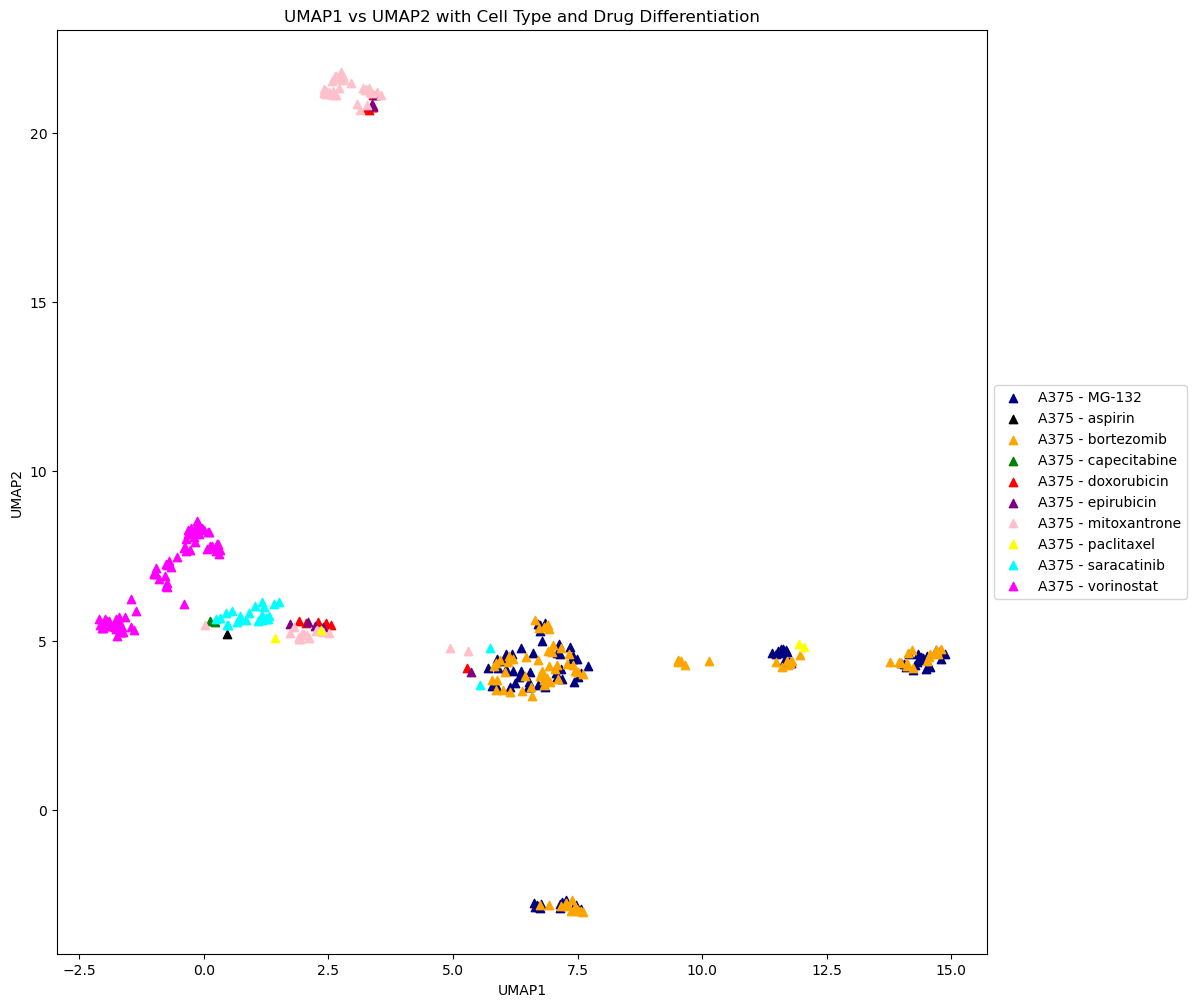

In [124]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,12))

for (cell_type, drug), group_df in UMAP_df.groupby(["cell_line_name", "drug_name"]):
    marker = cell_type_colors[cell_type]
    color = drug_markers[drug]
    ax.scatter(group_df["UMAP1"], group_df["UMAP2"], c=color, marker=marker, label=f"{cell_type} - {drug}")

# Add legend
ax.legend()

# Add labels and title
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_title("UMAP1 vs UMAP2 with Cell Type and Drug Differentiation")

#
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show the plot
# plt.xlim([0, 2.5])
# plt.ylim([])
plt.show()

In [86]:
embedding.shape

(3729, 2)

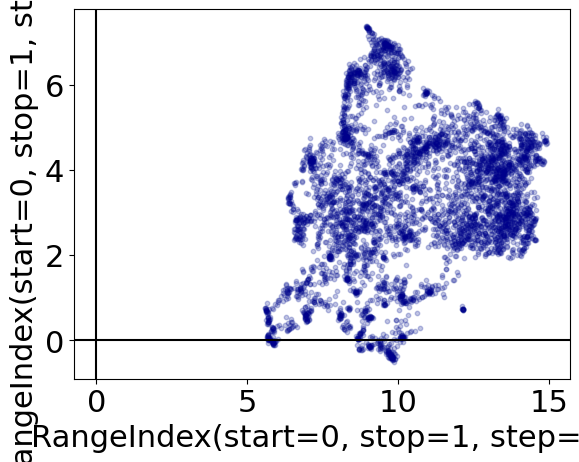

In [549]:
UMAP_df = pd.DataFrame()
UMAP_df['UMAP1'] = embedding[:,0]
UMAP_df['UMAP2'] = embedding[:,1]
graphScatter(x= embedding[:,0], y = embedding[:,1])

In [553]:
siginfo.iloc[:,:5000]['cell_iname'].value_counts()

MCF7               110887
PC3                107579
A549               101214
A375                90241
HT29                83048
                    ...  
IPS-ND34732            11
IPS-3                  10
MICROGLIA-PSEN1        10
IPS-15-2                9
TF1                     9
Name: cell_iname, Length: 248, dtype: int64

In [556]:
colors = plt.cm.tab250.colors 

AttributeError: module 'matplotlib.cm' has no attribute 'tab250'

In [559]:
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS)


NameError: name 'plot_colortable' is not defined

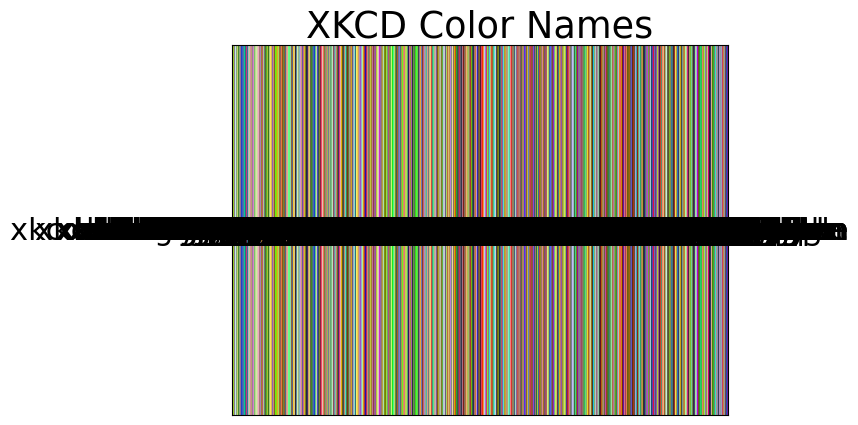

In [570]:
import matplotlib.colors as mcolors
xkcd_colors = dict(mcolors.XKCD_COLORS)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a color bar using the XKCD color names
for i, (name, color) in enumerate(xkcd_colors.items()):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, 0.5, name, va='center', ha='center')

# Set the aspect ratio and axis limits
ax.set_aspect('auto')
ax.set_xlim(0, len(xkcd_colors))
ax.set_ylim(0, 1)

# Remove ticks and labels from the axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Set the title and show the plot
plt.title('XKCD Color Names')
plt.show()

In [561]:
print(len(xkcd_colors))

949


In [574]:
colors[0]

KeyError: 0

In [580]:
labels = siginfo.iloc[:,:5000]['cell_iname'].tolist()

# Get the number of unique labels (categories)
num_labels = labels

# Define a color map with enough distinct colors for the unique labels
colors = dict(mcolors.XKCD_COLORS)  # You can choose a different color map if needed

# Plot each category with a different color
i = 0
key_list = colors.keys()
for i, val in enumerate(num_labels):
    plt.plot(x= embedding[i:i+1,0], y = embedding[i:i+1,1] , label=val, color=colors[key_list[i]])
    i+=1

# Add a legend to the plot
plt.legend()

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graph with Different Colors for Unique Labels')

# Show the plot
plt.show()

TypeError: 'dict_keys' object is not subscriptable

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 1.

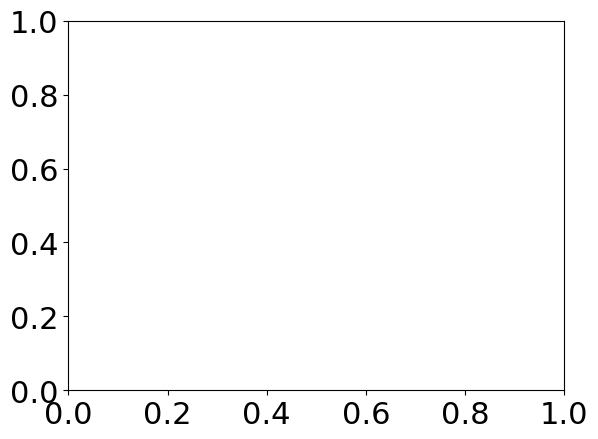

In [582]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sample UMAP embeddings in 'embedding' (Assuming 'embedding' is a 2D NumPy array)
# Example: embedding = np.random.rand(num_points, 2)

# Assuming 'labels' contains the list of labels
labels = siginfo.iloc[:, :5000]['cell_iname'].tolist()

# Get the number of unique labels (categories)
num_labels = len(set(labels))

# Define a color map with enough distinct colors for the unique labels
colors = list(mcolors.XKCD_COLORS.items())[:num_labels] # Use first 'num_labels' XKCD colors

# Create a scatter plot with colored points for each label
for i, val in enumerate(labels):
    plt.scatter(embedding[i, 0], embedding[i, 1], label=val, color=colors[i])

# Add a legend to the plot
plt.legend()

# Add labels and title to the plot
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('Scatter Plot with Different Colors for Unique Labels (UMAP)')

# Show the plot
plt.show()

In [5]:
siginfo_pert = siginfo[siginfo['pert_type'] == 'trt_cp']

In [6]:
siginfo_pert_hiq = siginfo_pert[siginfo_pert['is_hiq'] == 1]

In [607]:
cell_line_counts = siginfo_pert_hiq['cell_mfc_name'].value_counts()

In [608]:
cell_lines_to_remove = cell_line_counts[cell_line_counts < 8088].index

In [609]:
top_5_cell_lines_siginfo = siginfo_pert_hiq[~siginfo_pert_hiq['cell_mfc_name'].isin(cell_lines_to_remove)]

In [610]:
top_5_cell_lines_siginfo['cell_mfc_name'].value_counts()

MCF7    12680
PC3     11236
A375    10241
A549     8618
HA1E     8089
Name: cell_mfc_name, dtype: int64

In [649]:
# more cell lines, more perturbations (2 cell lines, more perturbations)


siginfo_pert_hiq_value_counts = siginfo_pert_hiq['cmap_name'].value_counts()

siginfo_pert_hiq_value_counts[siginfo_pert_hiq_value_counts < 1000]


sirolimus        976
geldanamycin     876
dasatinib        805
wortmannin       798
BRD-A19037878    788
                ... 
BRD-K68233995      1
BRD-K75972810      1
BRD-K47240178      1
BRD-K08521815      1
BRD-K00185670      1
Name: cmap_name, Length: 11698, dtype: int64

In [656]:
cell_mfc_names = ['MCF7', 'PC3', 'A375', 'A549', 'HA1E']
siginfo_pert_hiq_five_cell_lines = siginfo_pert_hiq[siginfo_pert_hiq['cell_mfc_name'].isin(cell_mfc_names)]
pert = ['doxorubicin', '']


bead_batch  nearest_dose  pert_dose pert_dose_unit pert_idose  \
1              b15         10.00      10.00             uM      10 uM   
11             b22          0.12       0.10             uM    0.12 uM   
58              b7         10.00      10.00             uM      10 uM   
59              b7          4.00       5.00             uM       4 uM   
69             b20          1.11       1.11             uM    1.11 uM   
...            ...           ...        ...            ...        ...   
1201893        b18         10.00      10.00             uM      10 uM   
1201895        b19         20.00      20.00             uM      20 uM   
1201896        b19         20.00      20.00             uM      20 uM   
1201899        b19         20.00      20.00             uM      20 uM   
1201902        b19         20.00      20.00             uM      20 uM   

        pert_itime  pert_time pert_time_unit cell_mfc_name    pert_mfc_id  \
1              3 h        3.0              h          A549  BRD-K81418486   
11             6 h        6.0              h          A375  BRD-A55453956   
58             6 h        6.0              h          MCF7  BRD-K54343811   
59             6 h        6.0              h          MCF7  BRD-K29313308   
69            24 h       24.0              h           PC3  BRD-A89859721   
...            ...        ...            ...           ...            ...   
1201893       24 h       24.0              h          MCF7  BRD-K19540840   
1201895       24 h       24.0              h          A375  BRD-K10749593   
1201896       24 h       24.0              h          A549  BRD-K23664396   
1201899       24 h       24.0              h          MCF7  BRD-K14002526   
1201902       24 h       24.0              h          HA1E  BRD-K21680192   

         nsample  cc_q75  ss_ngene       tas  pct_self_rank_q25  \
1              3  0.4900       263  0.363000           0.544959   
11             3  0.2200        76  0.130752           1.944440   
58             2  0.4900       108  0.232616           0.000000   
59             2  0.4000       102  0.204249           2.279200   
69             2  0.3300       118  0.199539           0.000000   
...          ...     ...       ...       ...                ...   
1201893        3  0.4700       246  0.343833           0.044326   
1201895        3  0.6478       499  0.574912           0.022203   
1201896        3  0.4196       177  0.275572           1.322990   
1201899        3  0.5500       453  0.504732           0.468332   
1201902        3  0.7000       578  0.643196           0.000000   

                       wt  median_recall_rank_spearman  \
1          0.34,0.34,0.31                     1.907360   
11         0.31,0.32,0.36                     4.444440   
58       """"""""""""""""                     0.404313   
59       """"""""""""""""                     2.291110   
69              0.50,0.50                     1.458180   
...                   ...                          ...   
1201893    0.35,0.33,0.32                     0.132979   
1201895    0.33,0.35,0.32                     0.133690   
1201896    0.41,0.38,0.21                     7.268280   
1201899    0.37,0.35,0.28                     2.921760   
1201902    0.32,0.33,0.35                     0.000000   

         median_recall_rank_wtcs_50  median_recall_score_spearman  \
1                          0.544959                      0.426195   
11                        28.888900                      0.206692   
58                         0.134771                      0.489091   
59                         2.021560                      0.398540   
69                         5.696600                      0.329995   
...                             ...                           ...   
1201893                    0.133333                      0.448132   
1201895                    0.401070                      0.637787   
1201896                    3.648470                      0.198094   
1201899       

In [4]:
pd.set_option('display.max_columns', 37)


In [7]:
compound_df_5_hiq

NameError: name 'compound_df_5_hiq' is not defined

In [8]:
compound_df_5_hiq= compound_df_5[siginfo_pert_hiq['sig_id']].iloc[:,:]

In [9]:
compound_df_5_hiq_corr = pd.DataFrame(np.corrcoef(compound_df_5_hiq.values, rowvar=False), columns=compound_df_5_hiq.columns)
